### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df_select = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_select.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [3]:
X = df_select[['GrLivArea', 'YearBuilt']]
y = df_select[['SalePrice']]
X.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

回帰分析で使用される指標を調査。([参考](https://stats.biopapyrus.jp/glm/lm-evaluation.html))

#### 決定係数$R^2$
決定係数は、観測値を$y_i(i=1,2,3,...,n)$、モデルから計算した計算値（予測値）を$\hat{y_i}$、観測値の平均を$\overline{y}$とすると、次の式によって定義される（他の定義方法も存在する）。観測値とモデルから計算した計算値（予測値）がほぼ同じになると、次式の分子が 0 に近づくため、$R^2$は 1 に近づく。逆に、観測値と予測値がかけ離れていると、分子が大きな値となり、$R^2$は 1 から離れた値となる。

$$
R^2=1-\frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i-\overline{y})^2}
$$

#### 二乗平均平方根誤差 RMSE
RMSE は、root mean squared error の略で、回帰モデルの誤差を評価する指標の一つである。RMSE は、観測値を$y_i(i=1,2,3,...,n)$、モデルから計算した計算値（予測値）を$\hat{y_i}$とすると、次の式によって定義される。

$$
RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2}
$$

観測値と計算値（予測値）が近づくほど、RMSE は小さくなる。逆に、観測値と計算値（予測値）が遠くなると、RMSE が著しく増える。そのため、外れ値が含まれると、観測値と計算値（予測値）の差が大きく離れるため、RMSE が著しく大きくなる。このことから、RMSE は外れ値の影響を受けやすいといわれている。

#### 平均絶対誤差 MAE
MAE は、mean absolute error の略で、観測値を$y_i(i=1,2,3,...,n)$、モデルから計算した計算値（予測値）を$\hat{y_i}$とすると、次の式によって定義される。観測値と計算値（予測値）が近づくほど、MAE は小さくなる。MAE は、誤差を二乗していないので、外れ値の影響を受けにくいと言われている。

$$
MAE=\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y_i}|
$$

In [4]:
import matplotlib.pyplot as plt

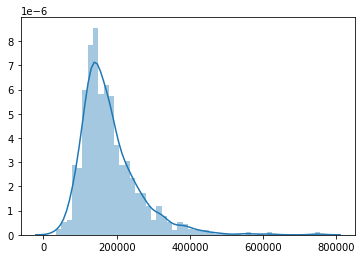

In [5]:
import seaborn as sns

sns.distplot(y, bins=50)

住宅価格の分類を大雑把にして、特徴量ごとの分類と相関があるかを見てみる。

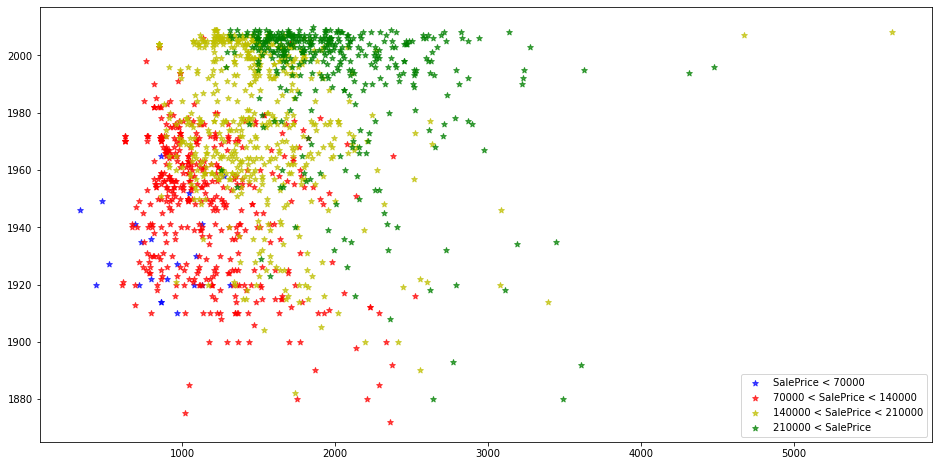

In [6]:
plt.figure(figsize=(16, 8))

df_1 = df_select.query('SalePrice < 70000')
df_2 = df_select.query('70000 < SalePrice < 140000')
df_3 = df_select.query('140000 < SalePrice < 210000')
df_4 = df_select.query('210000 < SalePrice')

plt.scatter(df_1['GrLivArea'], df_1['YearBuilt'], marker="*", alpha=0.7, c='b', label="SalePrice < 70000")
plt.scatter(df_2['GrLivArea'], df_2['YearBuilt'], marker="*", alpha=0.7, c='r', label="70000 < SalePrice < 140000")
plt.scatter(df_3['GrLivArea'], df_3['YearBuilt'], marker="*", alpha=0.7, c='y', label="140000 < SalePrice < 210000")
plt.scatter(df_4['GrLivArea'], df_4['YearBuilt'], marker="*", alpha=0.7, c='g', label="210000 < SalePrice")
plt.legend()

住宅価格毎に相関はあるらしい。なんとなく分類されているのが見て取れる。

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=32)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1095, 2)
(365, 2)
(1095, 1)
(365, 1)


In [8]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()

def plot_result(X_test, y_test, y_pred, model, columns):
    for i in range(X_test.shape[1]):
        plt.figure(figsize=(16, 8))

        plt.xlabel(columns[i])
        plt.ylabel("SalePrice")

        plt.scatter(X_test[:, i], y_test.ravel(), marker="x", alpha=0.7, c='r', label="test")
        plt.scatter(X_test[:, i], y_pred.ravel(), marker="x", alpha=0.7, c='b', label="pred")
        
        plt.legend()
        plt.show()

# 試験用関数の定義
def scale2plot(scaler, X_train, X_test, y_train, y_test, model, columns):
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train_scaled = np.log(y_train)
    model.fit(X_train_scaled, y_train_scaled.ravel())
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test ,np.exp(y_pred))
    mae = mean_absolute_error(y_test ,np.exp(y_pred))
    r2 = r2_score(y_test ,np.exp(y_pred))
    print("平均二乗誤差(RMSE):{}({})".format((mse), np.sqrt(mse)))
    print("平均絶対誤差:{}".format(mae))
    print("決定係数:{}".format(r2))
    plot_result(X_test, y_test, np.exp(y_pred), model, columns)
    
    return {"mse":mse, "rmse":np.sqrt(mse), "mae":mae, "r2":r2}

平均二乗誤差(RMSE):3500546924.8445153(59165.420009026515)
平均絶対誤差:31682.132552950196
決定係数:0.4553935992033371


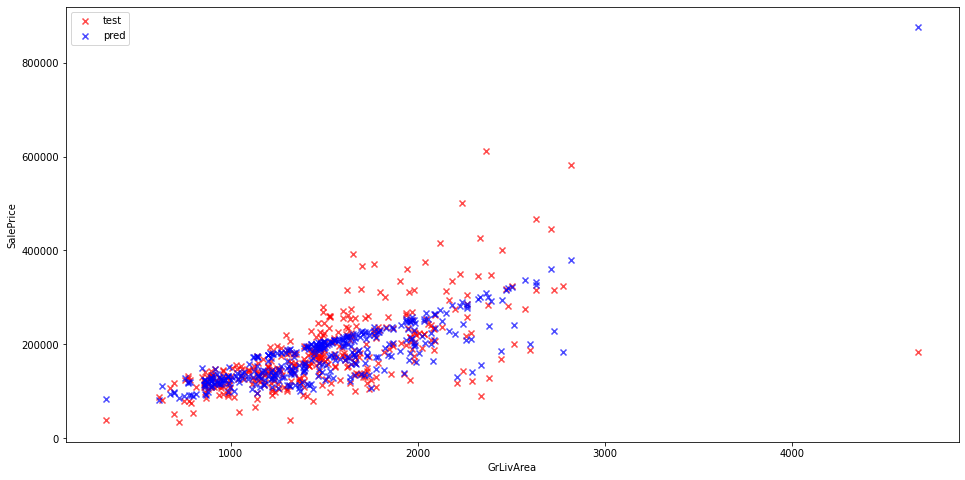

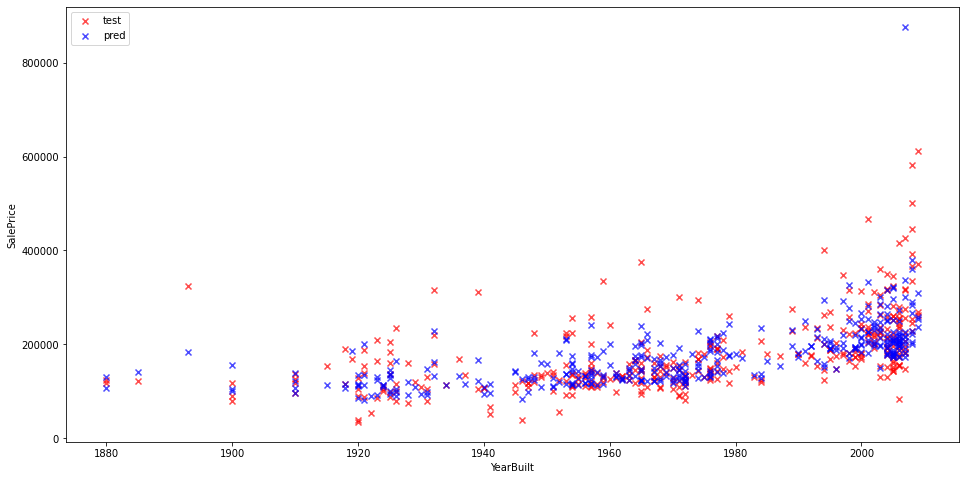

{'mse': 3500546924.8445153,
 'rmse': 59165.420009026515,
 'mae': 31682.132552950196,
 'r2': 0.4553935992033371}

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scale2plot(scaler, X_train, X_test, y_train.ravel(), y_test.ravel(), lr, df_select.columns)

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

***線形回帰***
平均二乗誤差(RMSE):3500546924.8445153(59165.420009026515)
平均絶対誤差:31682.132552950196
決定係数:0.4553935992033371


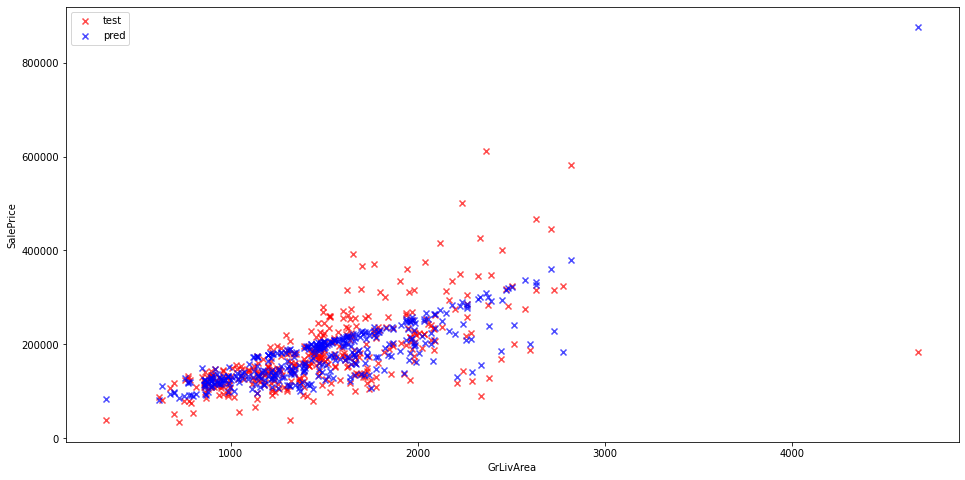

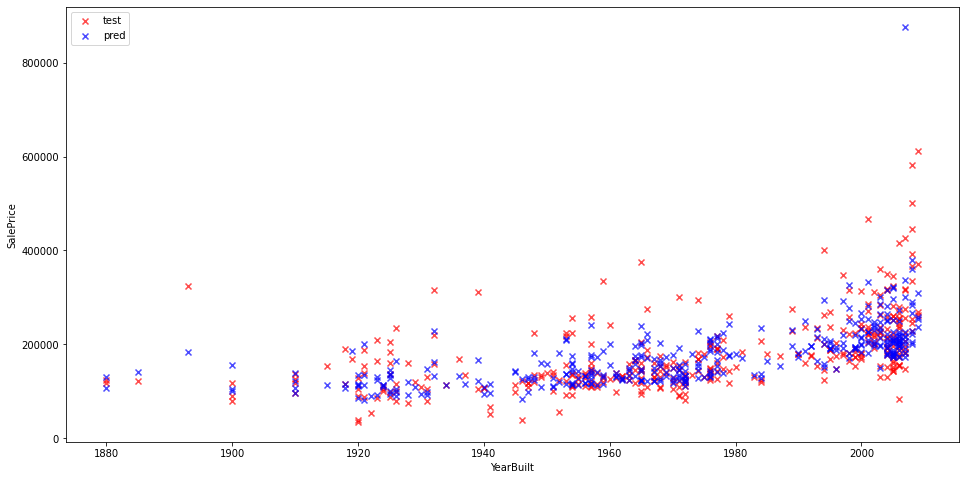

***SVM***
平均二乗誤差(RMSE):2183946373.4201365(46732.71202723138)
平均絶対誤差:29489.336230529945
決定係数:0.6602270446598585


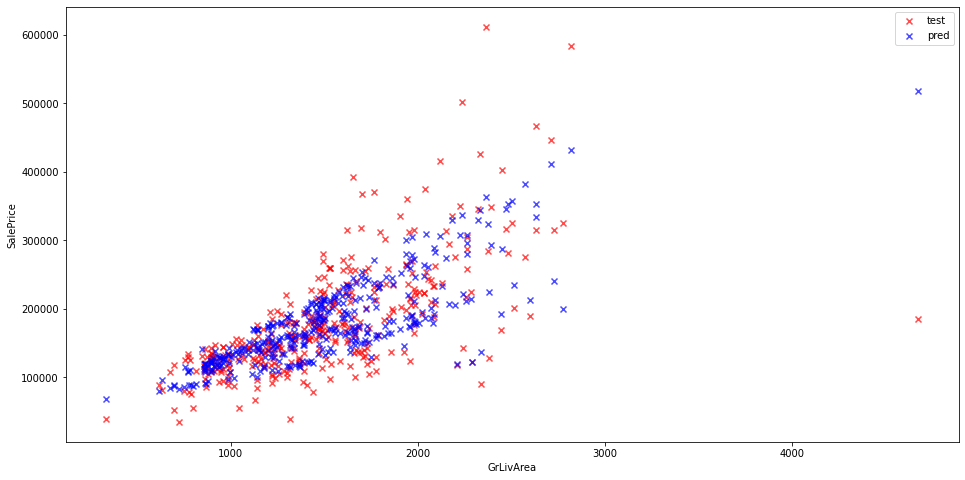

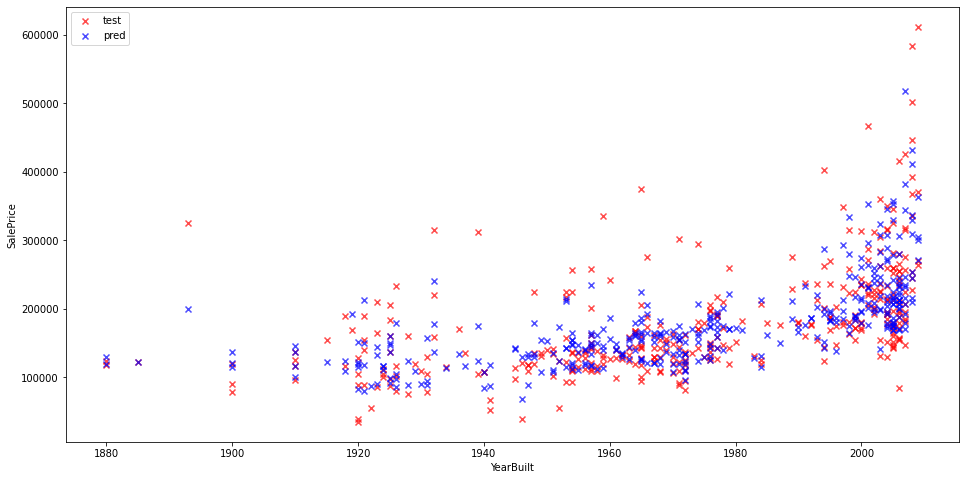

***決定木***
平均二乗誤差(RMSE):3773146052.732652(61425.93957549735)
平均絶対誤差:38562.94055607172
決定係数:0.41298330358758506


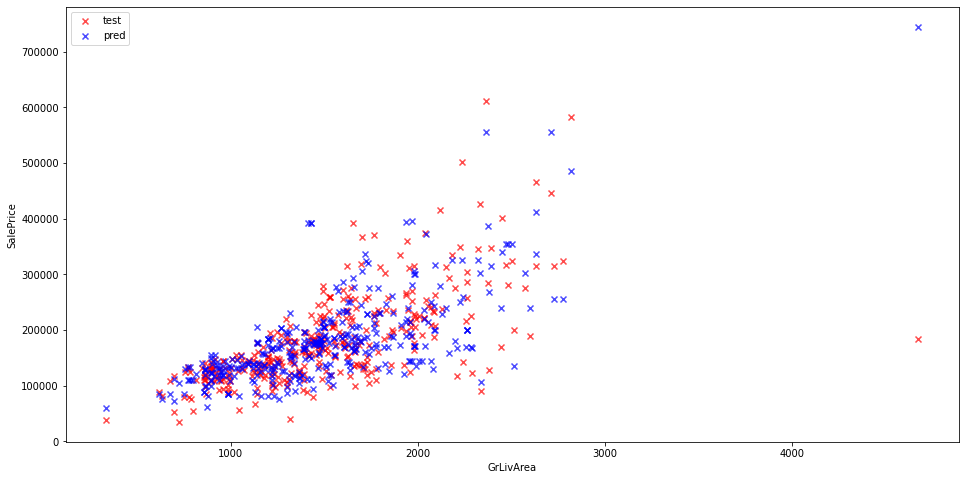

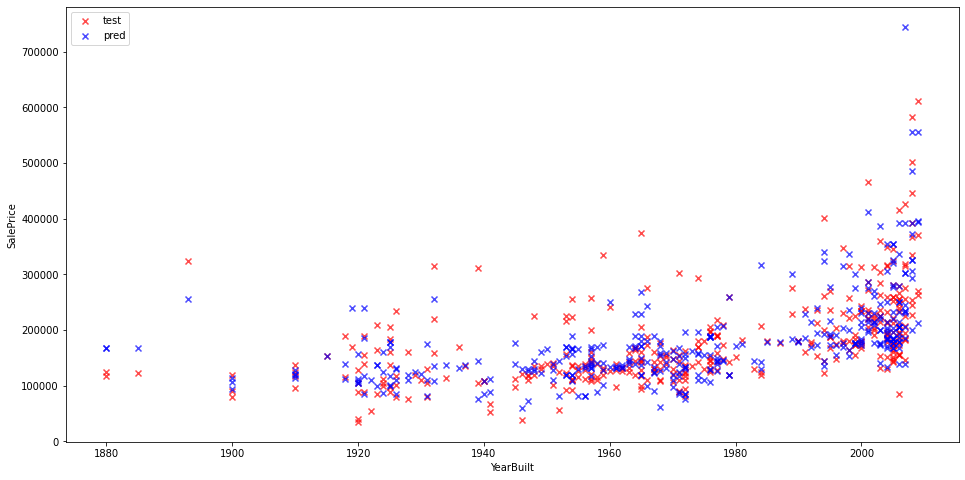

***ランダムフォレスト***
平均二乗誤差(RMSE):2202737911.38403(46933.334756695374)
平均絶対誤差:30215.084527421917
決定係数:0.6573035038316193


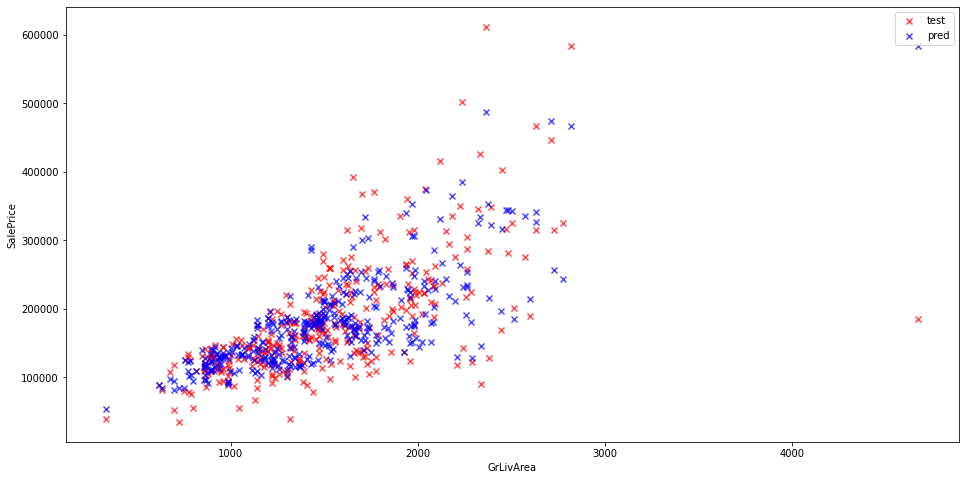

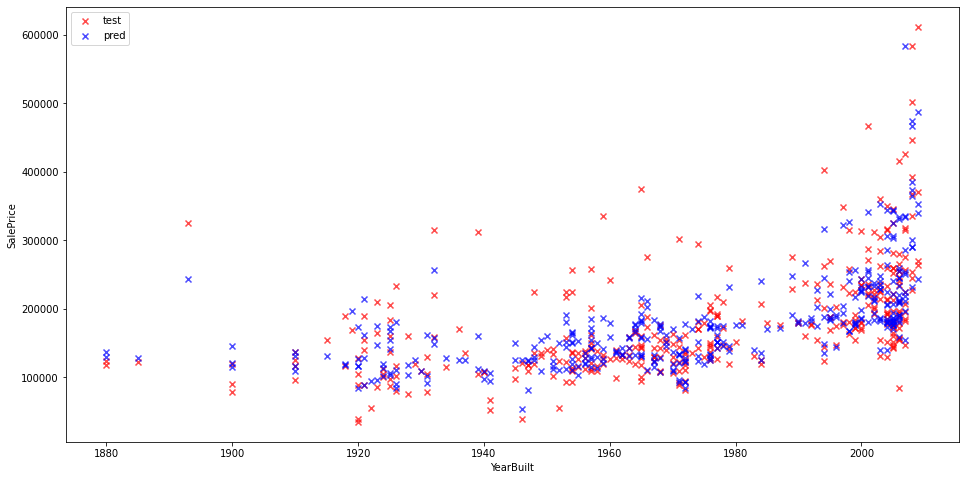

{'lr': {'mse': 3500546924.8445153, 'rmse': 59165.420009026515, 'mae': 31682.132552950196, 'r2': 0.4553935992033371}, 'svm': {'mse': 2183946373.4201365, 'rmse': 46732.71202723138, 'mae': 29489.336230529945, 'r2': 0.6602270446598585}, 'dt': {'mse': 3773146052.732652, 'rmse': 61425.93957549735, 'mae': 38562.94055607172, 'r2': 0.41298330358758506}, 'rf': {'mse': 2202737911.38403, 'rmse': 46933.334756695374, 'mae': 30215.084527421917, 'r2': 0.6573035038316193}}


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dict_metrics = {}

# 線形回帰
lr = LinearRegression()
print("***線形回帰***")
dict_metrics['lr'] = scale2plot(scaler, X_train, X_test, y_train.ravel(), y_test.ravel(), lr, df_select.columns)

# SVM
svm = SVR()
print("***SVM***")
dict_metrics['svm'] = scale2plot(scaler, X_train, X_test, y_train.ravel(), y_test.ravel(), svm, df_select.columns)

# 決定木
dt = DecisionTreeRegressor()
print("***決定木***")
dict_metrics['dt'] = scale2plot(scaler, X_train, X_test, y_train.ravel(), y_test.ravel(), dt, df_select.columns)

# ランダムフォレスト
rf = RandomForestRegressor()
print("***ランダムフォレスト***")
dict_metrics['rf'] = scale2plot(scaler, X_train, X_test, y_train.ravel(), y_test.ravel(), rf, df_select.columns)

print(dict_metrics)

In [11]:
pd.DataFrame(dict_metrics)

,lr,svm,dt,rf
mse,3.500547e+09,2.183946e+09,3.773146e+09,2.202738e+09
rmse,5.916542e+04,4.673271e+04,6.142594e+04,4.693333e+04
mae,3.168213e+04,2.948934e+04,3.856294e+04,3.021508e+04
r2,4.553936e-01,6.602270e-01,4.129833e-01,6.573035e-01


MSEの結果としては、以下の順で性能が良いことが分かる。

1. SVM
2. ランダムフォレスト
3. 線形回帰
4. 決定木

何回か実行してみたが、SVMよりもランダムフォレストのほうが性能が良くなるときもある。
決定係数も、SVMとランダムフォレストがより1に近づいていることが分かる。

### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Week2の授業前課題から「TotRmsAbvGrd」も目的変数との相関が大きいことがわかっているため、取り入れてみる。

In [12]:
df_select_2 = df[['GrLivArea', 'YearBuilt', 'TotRmsAbvGrd', 'SalePrice']]
X_2 = df_select_2[['GrLivArea', 'YearBuilt', 'TotRmsAbvGrd']]
y_2 = df_select_2[['SalePrice']]

In [13]:
X_2 = np.array(X_2)
y_2 = np.array(y_2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,
                                                            test_size=0.25,
                                                            random_state=32)

y_train_2 = y_train_2.reshape(-1, 1)
y_test_2 = y_test_2.reshape(-1, 1)
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(1095, 3)
(365, 3)
(1095, 1)
(365, 1)


***線形回帰***
平均二乗誤差(RMSE):3620736220.9856434(60172.553718332776)
平均絶対誤差:31656.186276182238
決定係数:0.43669484686805415


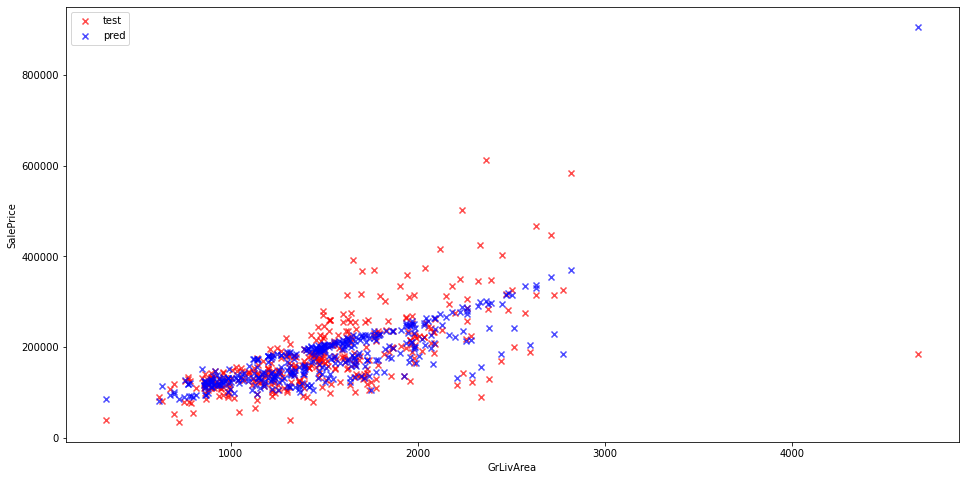

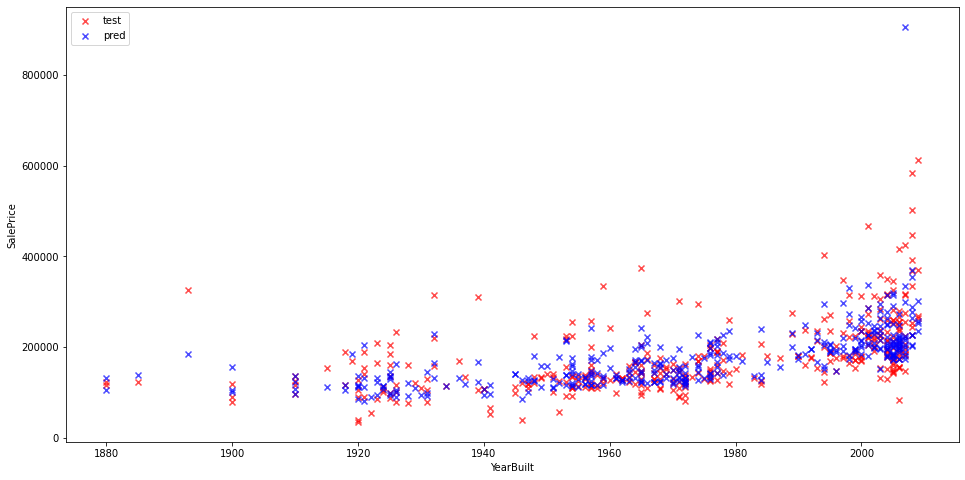

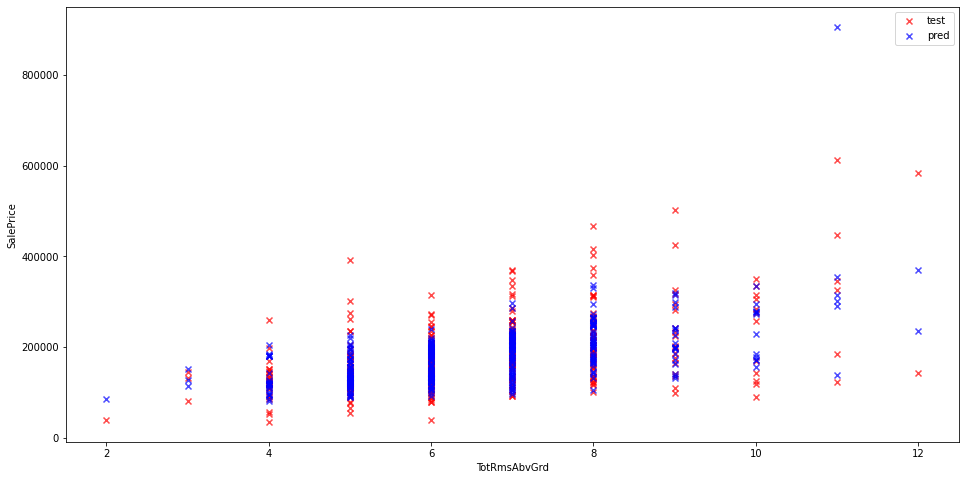

***SVM***
平均二乗誤差(RMSE):2058261632.0195172(45368.06841843189)
平均絶対誤差:28667.74006608962
決定係数:0.6797807647266993


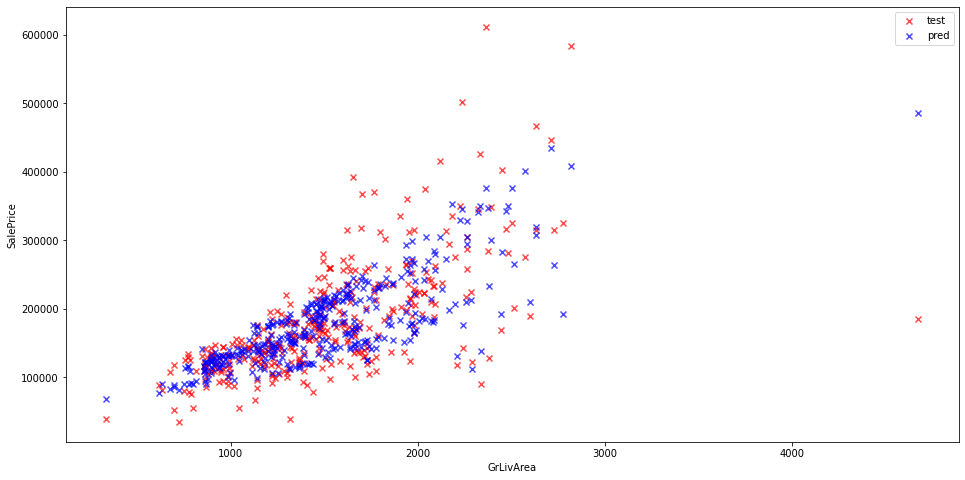

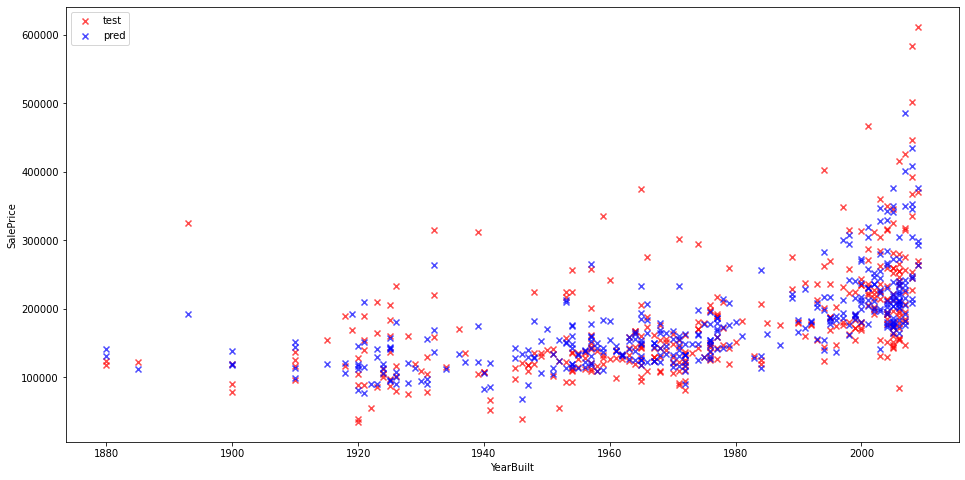

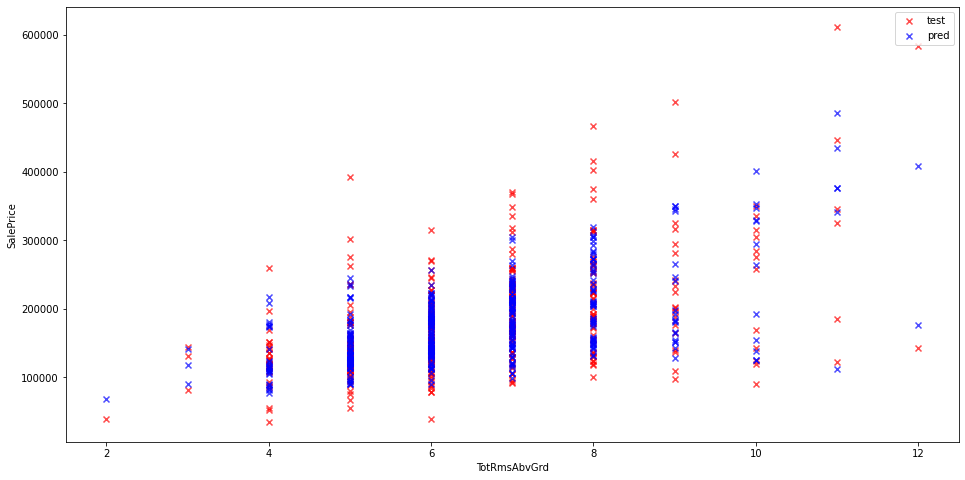

***決定木***
平均二乗誤差(RMSE):3467151880.1890492(58882.52610230856)
平均絶対誤差:36612.7847553132
決定係数:0.46058911735085195


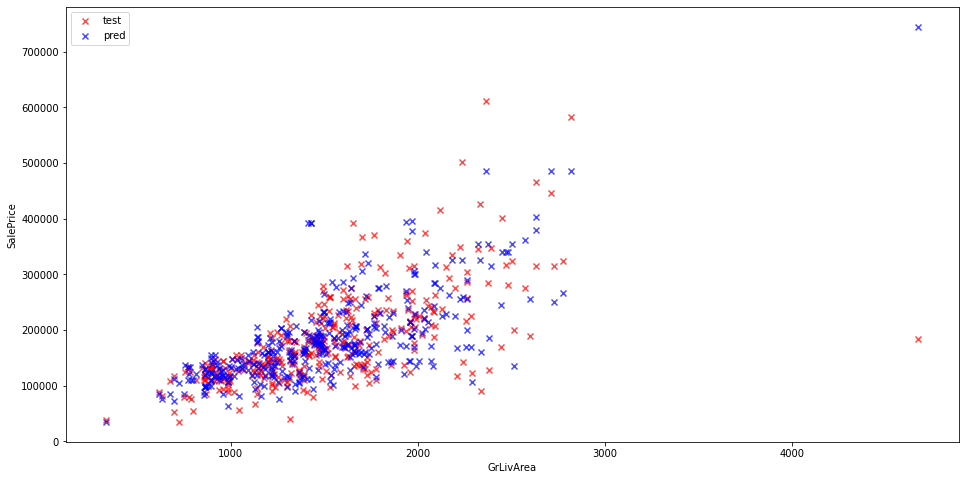

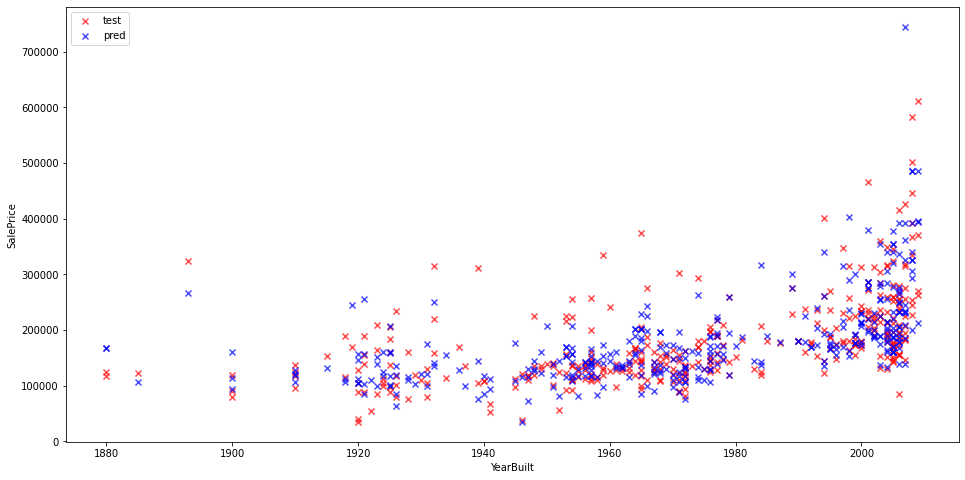

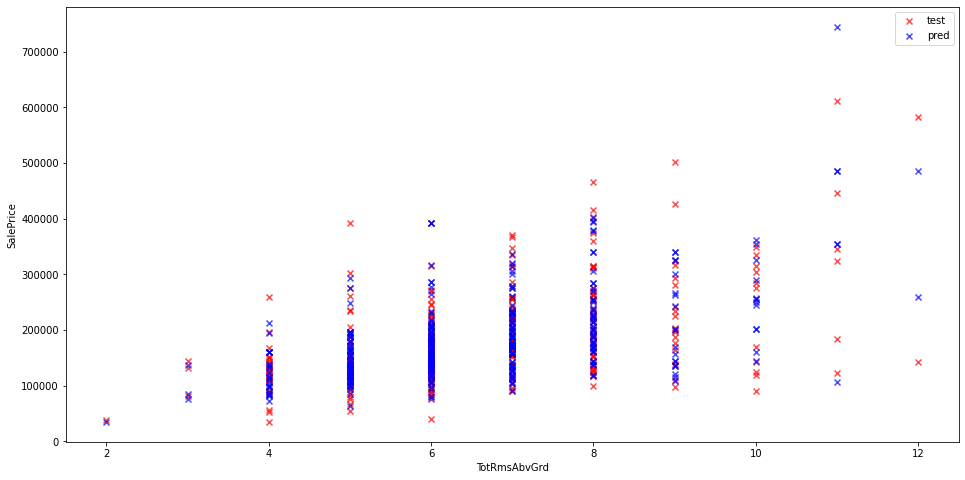

***ランダムフォレスト***
平均二乗誤差(RMSE):2218792853.9934363(47104.064092108194)
平均絶対誤差:28915.866526948477
決定係数:0.6548057157152969


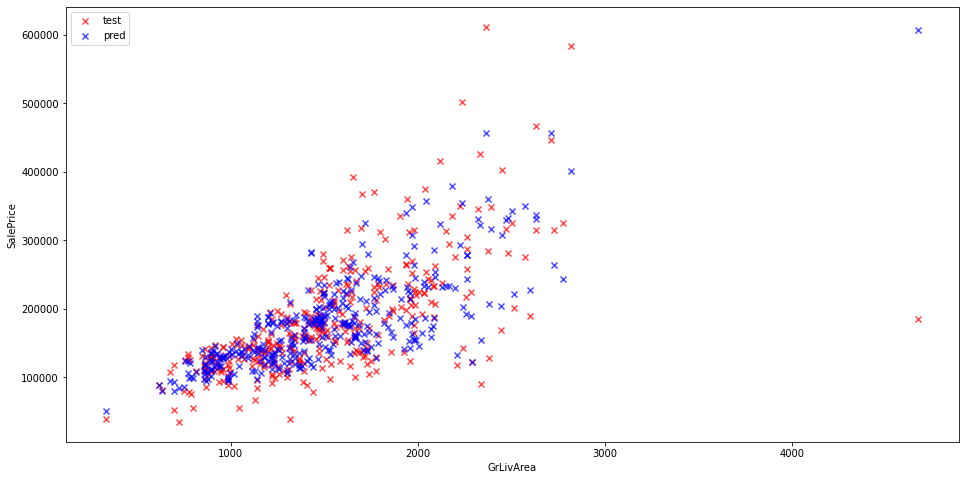

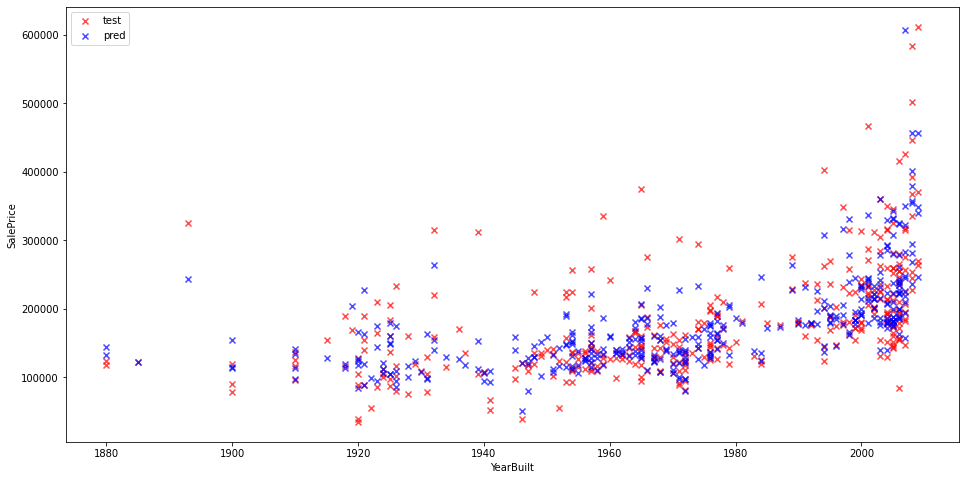

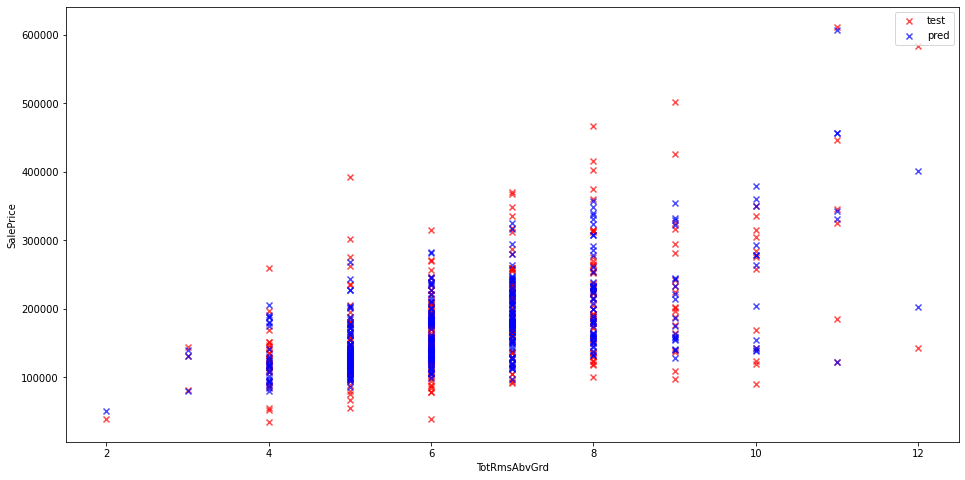

{'lr': {'mse': 3620736220.9856434, 'rmse': 60172.553718332776, 'mae': 31656.186276182238, 'r2': 0.43669484686805415}, 'svm': {'mse': 2058261632.0195172, 'rmse': 45368.06841843189, 'mae': 28667.74006608962, 'r2': 0.6797807647266993}, 'dt': {'mse': 3467151880.1890492, 'rmse': 58882.52610230856, 'mae': 36612.7847553132, 'r2': 0.46058911735085195}, 'rf': {'mse': 2218792853.9934363, 'rmse': 47104.064092108194, 'mae': 28915.866526948477, 'r2': 0.6548057157152969}}


In [14]:
dict_metrics_2 = {}

# 線形回帰
lr_2 = LinearRegression()
print("***線形回帰***")
dict_metrics_2['lr'] = scale2plot(scaler, X_train_2, X_test_2, y_train_2.ravel(), y_test_2.ravel(), lr_2, df_select_2.columns)

# SVM
svm_2 = SVR()
print("***SVM***")
dict_metrics_2['svm'] = scale2plot(scaler, X_train_2, X_test_2, y_train_2.ravel(), y_test_2.ravel(), svm_2, df_select_2.columns)

# 決定木
dt_2 = DecisionTreeRegressor()
print("***決定木***")
dict_metrics_2['dt'] = scale2plot(scaler, X_train_2, X_test_2, y_train_2.ravel(), y_test_2.ravel(), dt_2, df_select_2.columns)

# ランダムフォレスト
rf_2 = RandomForestRegressor()
print("***ランダムフォレスト***")
dict_metrics_2['rf'] = scale2plot(scaler, X_train_2, X_test_2, y_train_2.ravel(), y_test_2.ravel(), rf_2, df_select_2.columns)

print(dict_metrics_2)

In [15]:
pd.DataFrame(dict_metrics_2)

,lr,svm,dt,rf
mse,3.620736e+09,2.058262e+09,3.467152e+09,2.218793e+09
rmse,6.017255e+04,4.536807e+04,5.888253e+04,4.710406e+04
mae,3.165619e+04,2.866774e+04,3.661278e+04,2.891587e+04
r2,4.366948e-01,6.797808e-01,4.605891e-01,6.548057e-01


In [16]:
pd.DataFrame(dict_metrics)

,lr,svm,dt,rf
mse,3.500547e+09,2.183946e+09,3.773146e+09,2.202738e+09
rmse,5.916542e+04,4.673271e+04,6.142594e+04,4.693333e+04
mae,3.168213e+04,2.948934e+04,3.856294e+04,3.021508e+04
r2,4.553936e-01,6.602270e-01,4.129833e-01,6.573035e-01


SVM・決定木は指標値が改善したが、ランダムフォレスト・線形回帰は指標値が悪化した。

回帰分析において、非線形SVRは線形回帰よりも優れる傾向があるらしい([参考](https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf))。

Kaggleノートブックを参照し、参考になったと思ったことを試してみる。

In [17]:
# 目的変数との相関の高い特徴量を選ぶ。
df_corr = df.corr()
list_strong_corr = []

for column in df_corr.columns:
    if abs(df_corr.loc['SalePrice', column]) >= 0.5 and\
       column != 'SalePrice':
        list_strong_corr.append(column)

print(len(list_strong_corr))
print(list_strong_corr)

10
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


In [18]:
list_strong_corr.append('SalePrice')
df_select_3 = df[list_strong_corr]

外れ値があるとモデルの性能が下がるらしい。箱ひげ図で学習データを確認し、外れ値を消す。

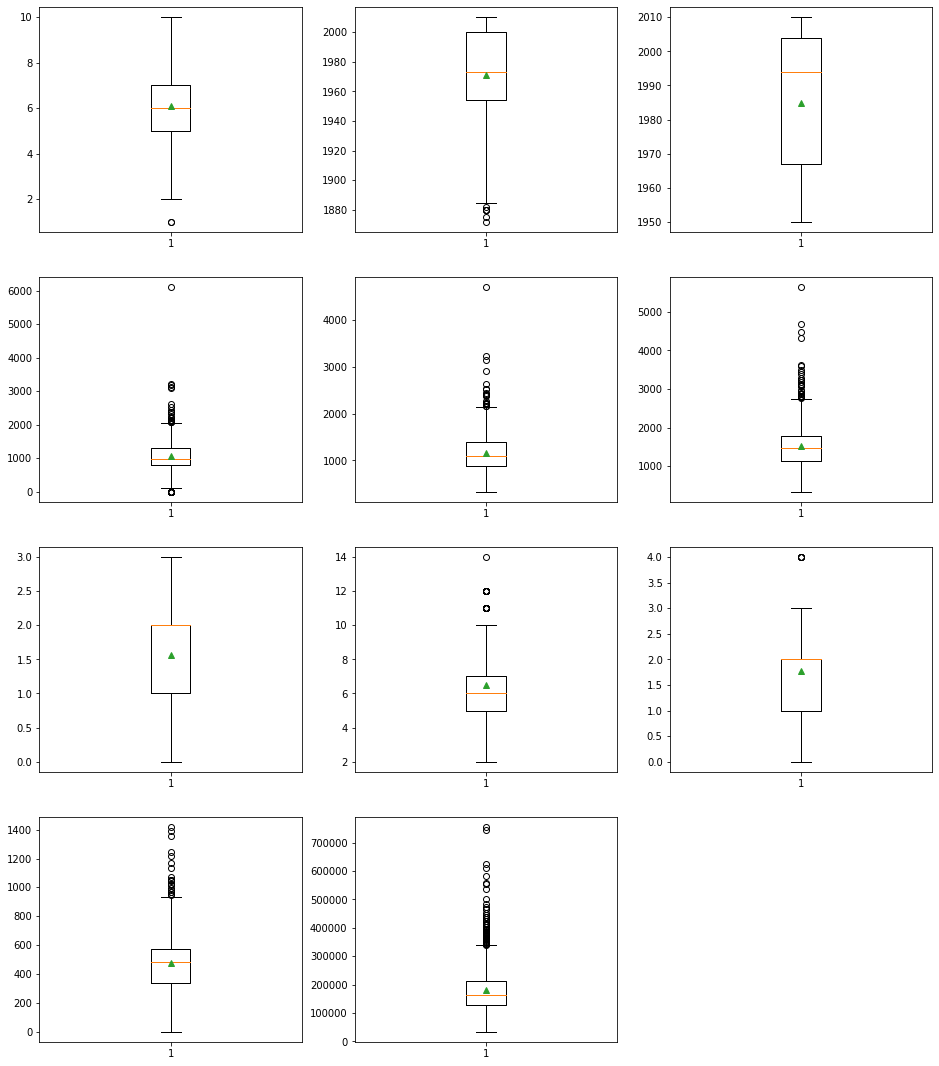

In [19]:
plt.figure(figsize=(16, 24))

for i, column in enumerate(df_select_3.columns):
    plt.subplot(5, 3, i+1)
    plt.boxplot(df_select_3[column],
                showmeans=True)

plt.show()

In [20]:
df_select_3.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [21]:
# OverallQual
df_select_3 = df_select_3.drop(index=df_select_3.query("OverallQual<4 or OverallQual>6").index)

# YearBuilt
#df_select_3 = df_select_3.drop(index=df_select_3.query("YearBuilt<1945 or YearBuilt>1965").index)

# TotalBsmtSF
#df_select_3 = df_select_3.drop(index=df_select_3.query("100 < TotalBsmtSF < 2000").index)

# TotRmsAbvGrd
#df_select_3 = df_select_3.drop(index=df_select_3.query("TotRmsAbvGrd < 10").index)

# 1stFlrSF
#df_select_3 = df_select_3.drop(index=df_select_3.query("1stFlrSF > 2000").index)
# 変数名を変更する必要あり。
df_select_3["firstFlrSF"] = df_select_3["1stFlrSF"]
df_select_3 = df_select_3.drop(columns=["1stFlrSF"])
df_select_3 = df_select_3.drop(index=df_select_3.query("firstFlrSF > 2000").index)

# GrLivArea
df_select_3 = df_select_3.drop(index=df_select_3.query("GrLivArea > 2800").index)

# GarageCars
df_select_3 = df_select_3.drop(index=df_select_3.query("GarageCars > 3").index)

# GarageArea
df_select_3 = df_select_3.drop(index=df_select_3.query("GarageArea > 900").index)

# SalePrice
df_select_3 = df_select_3.drop(index=df_select_3.query("SalePrice > 500000").index)

In [22]:
df_select_3.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'firstFlrSF'],
      dtype='object')

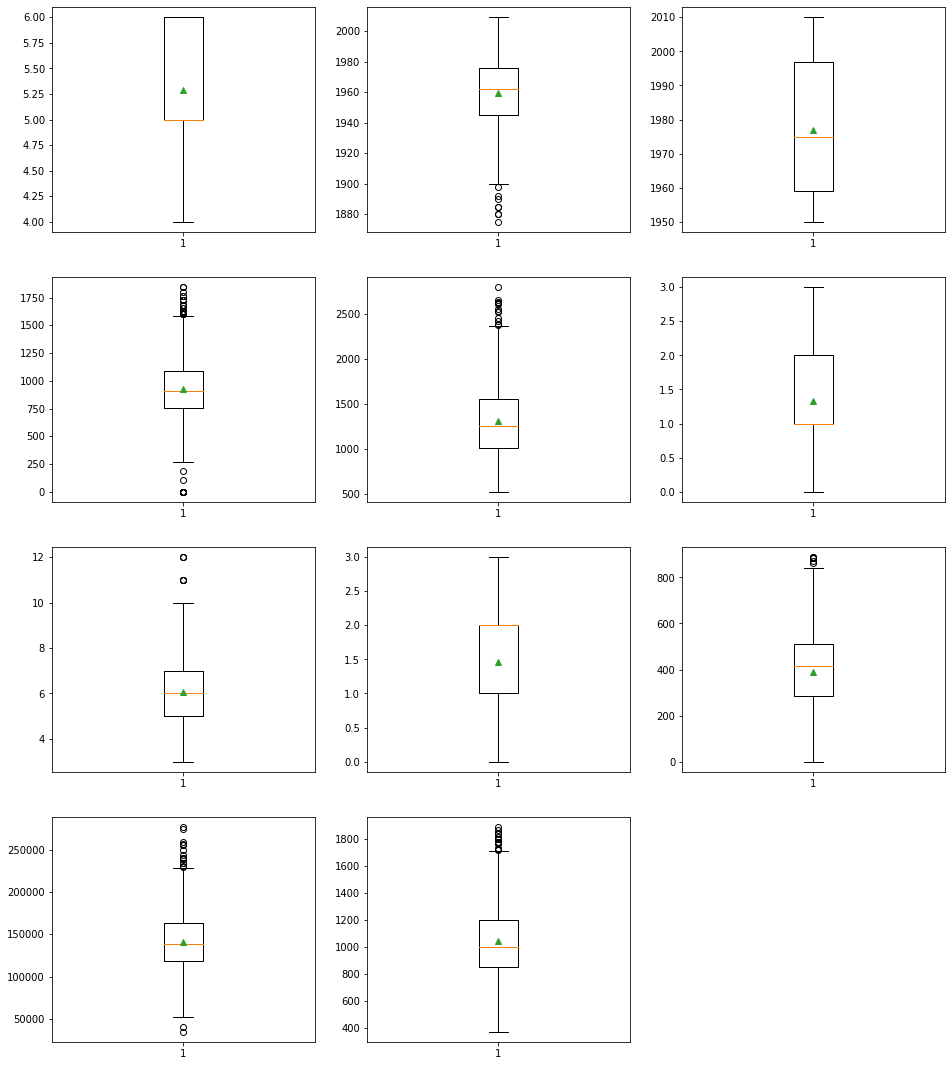

In [23]:
plt.figure(figsize=(16, 24))

for i, column in enumerate(df_select_3.columns):
    plt.subplot(5, 3, i+1)
    plt.boxplot(df_select_3[column],
                showmeans=True)

plt.show()

In [24]:
df_select_3.shape

(869, 11)

選択した特徴量で外れ値を消し切ることは難しいので、ひとまずこれで学習・評価してみる。

In [25]:
X_3 = df_select_3[['OverallQual', 'YearBuilt', 'YearRemodAdd',
                   'TotalBsmtSF', 'GrLivArea','FullBath', 'TotRmsAbvGrd',
                   'GarageCars', 'GarageArea', 'firstFlrSF']]
y_3 = df_select_3[['SalePrice']]

X_3 = np.array(X_3)
y_3 = np.array(y_3)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3,
                                                            test_size=0.25,
                                                            random_state=32)

y_train_3 = y_train_3.reshape(-1, 1)
y_test_3 = y_test_3.reshape(-1, 1)
print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

(651, 10)
(218, 10)
(651, 1)
(218, 1)


***線形回帰***
平均二乗誤差(RMSE):357396133.5704647(18904.92352723133)
平均絶対誤差:13906.063424791222
決定係数:0.6971889777778508


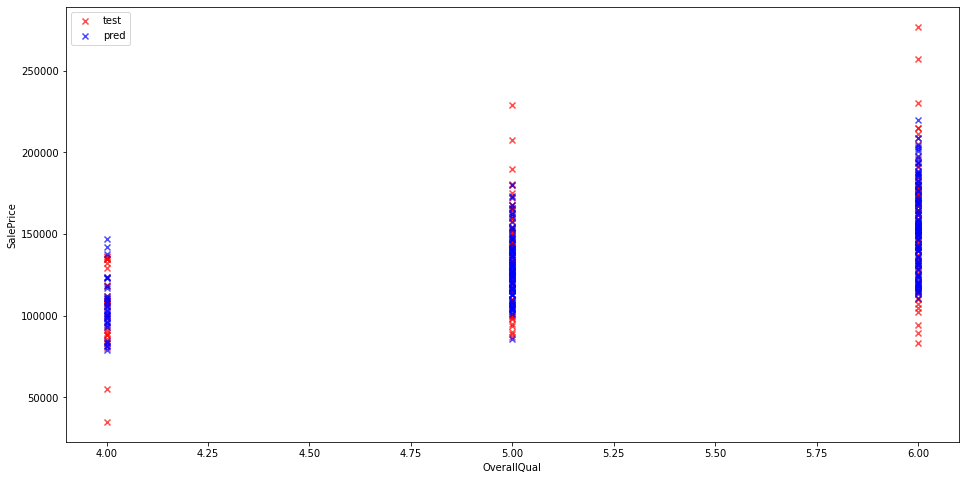

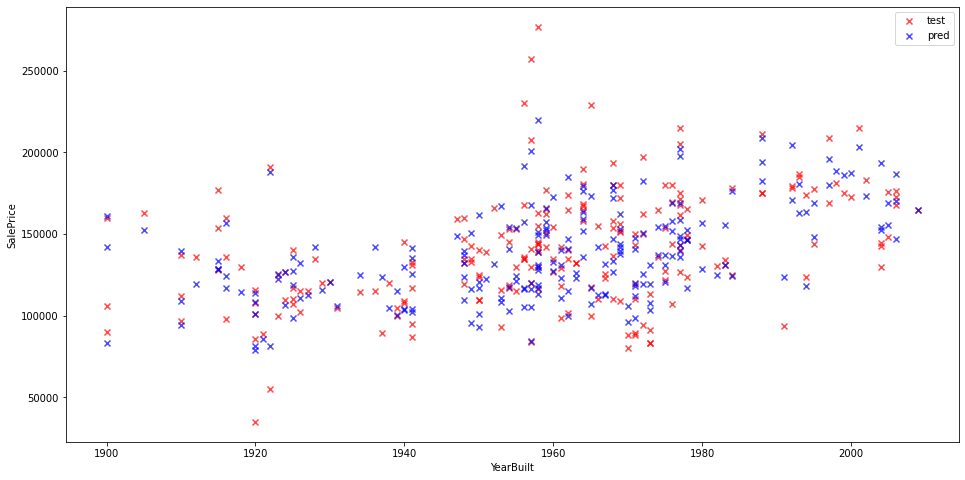

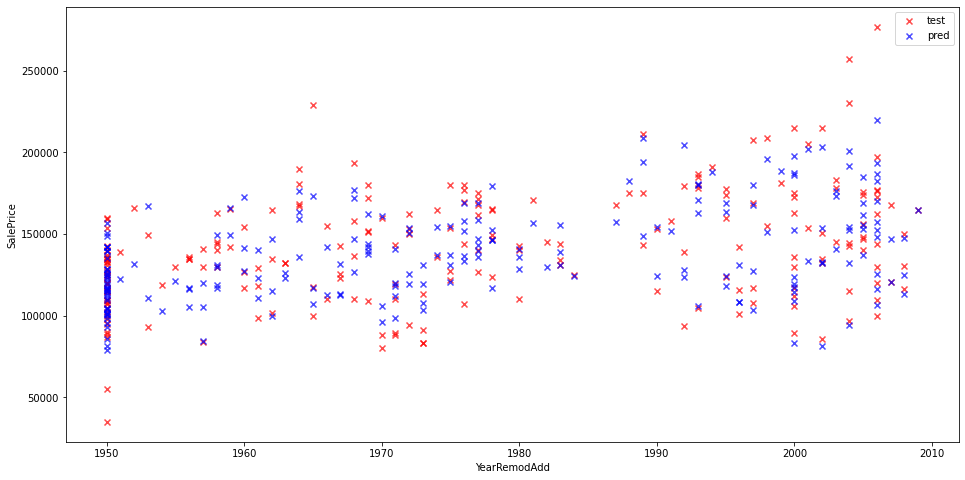

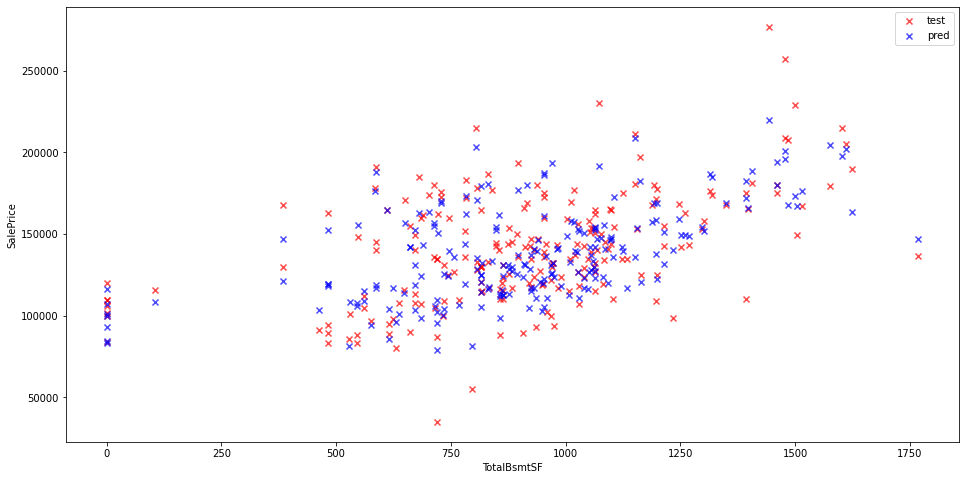

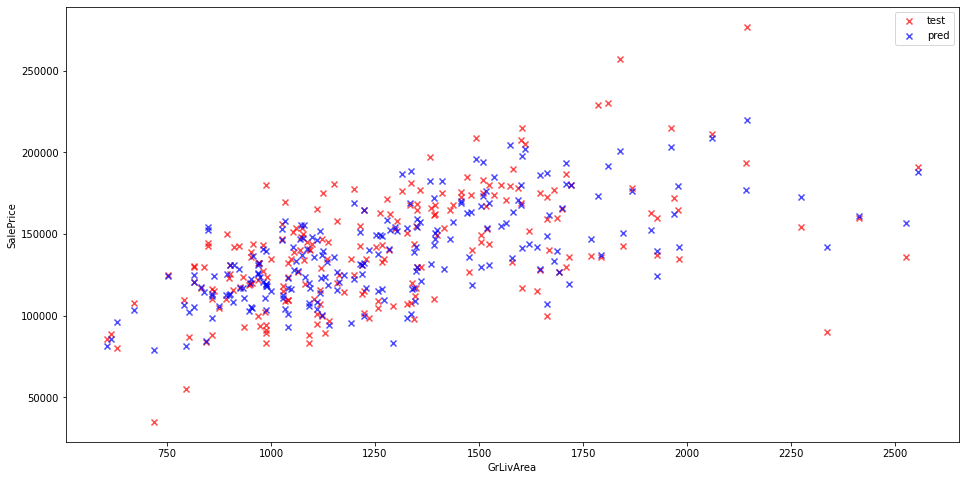

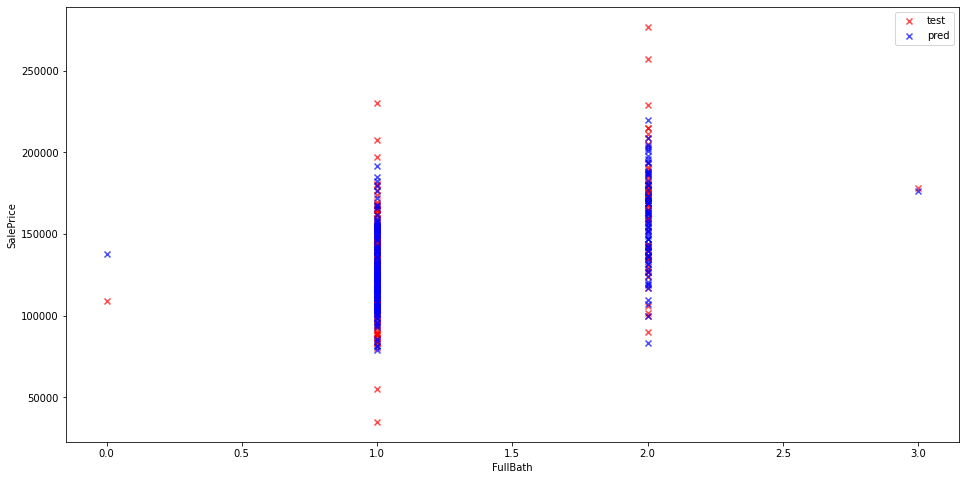

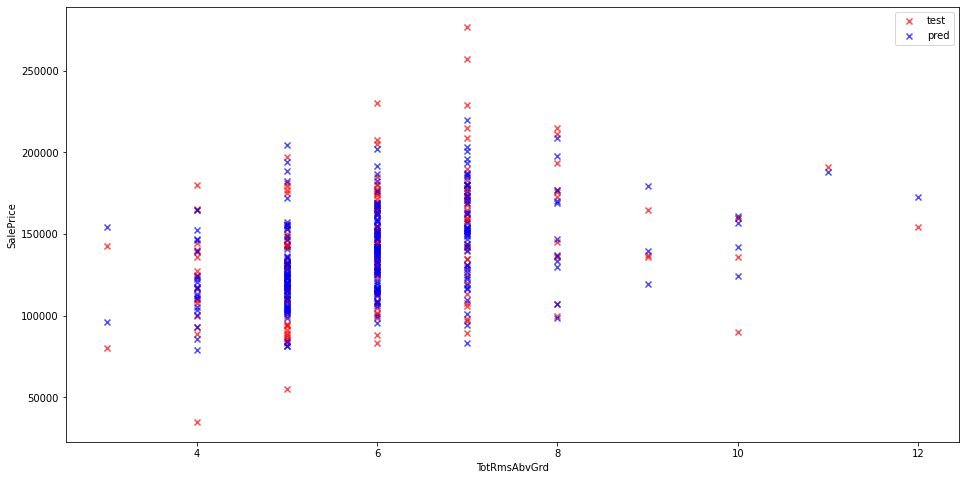

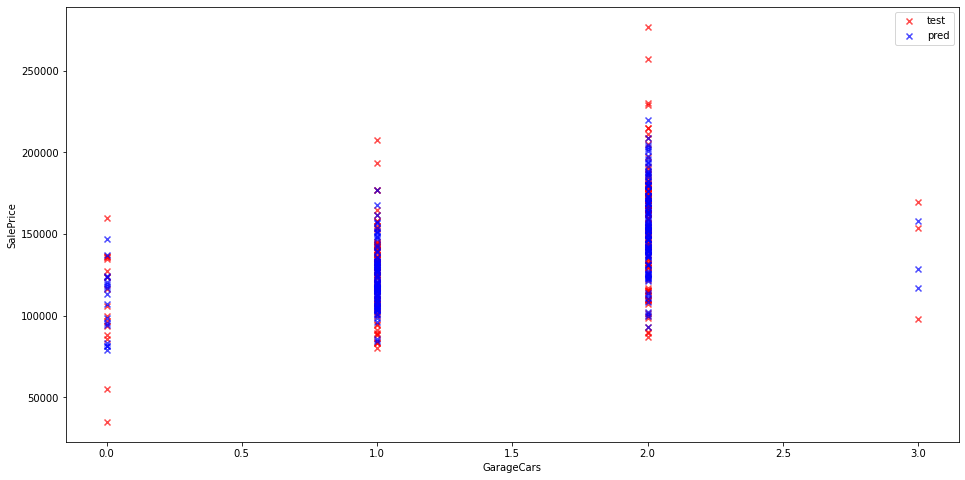

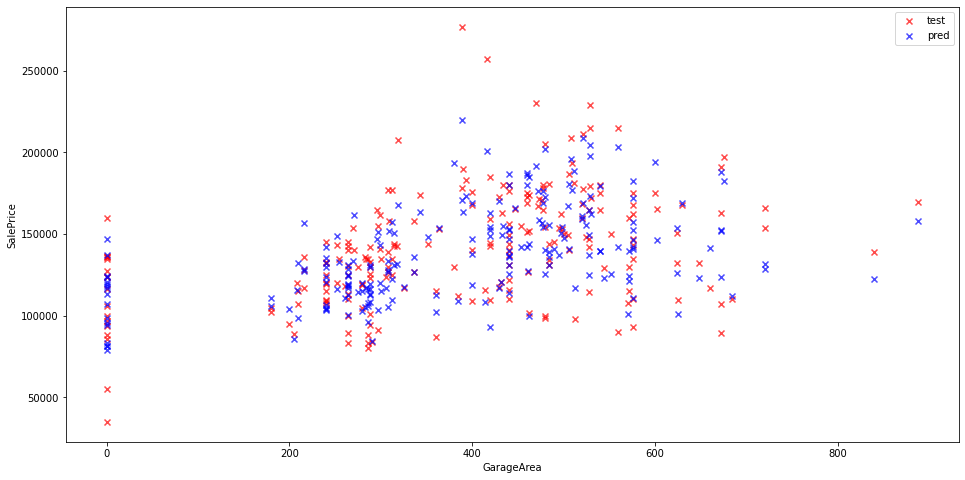

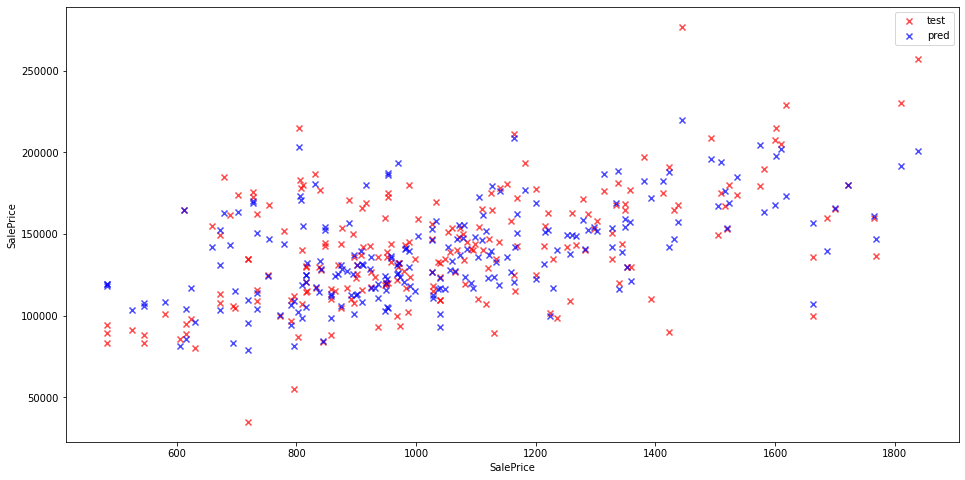

***SVM***
平均二乗誤差(RMSE):377688008.06351715(19434.196872099375)
平均絶対誤差:13937.31727955281
決定係数:0.6799962812686333


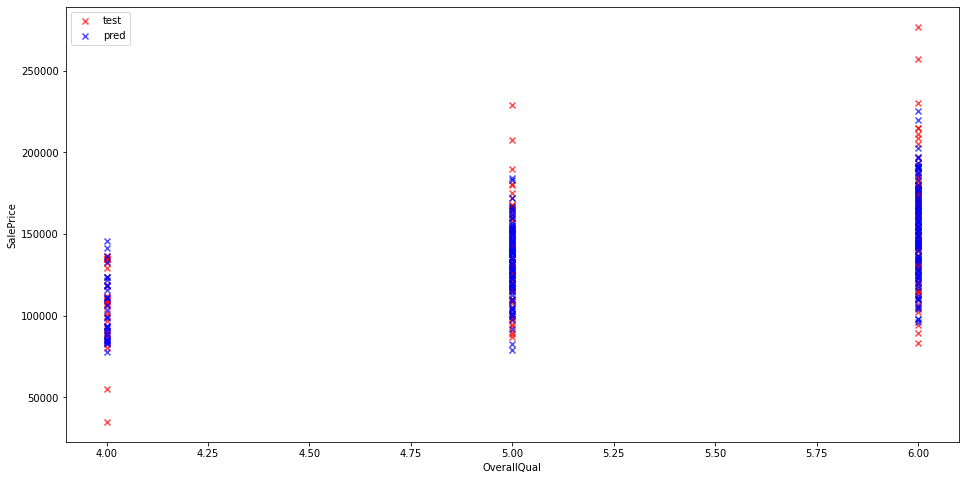

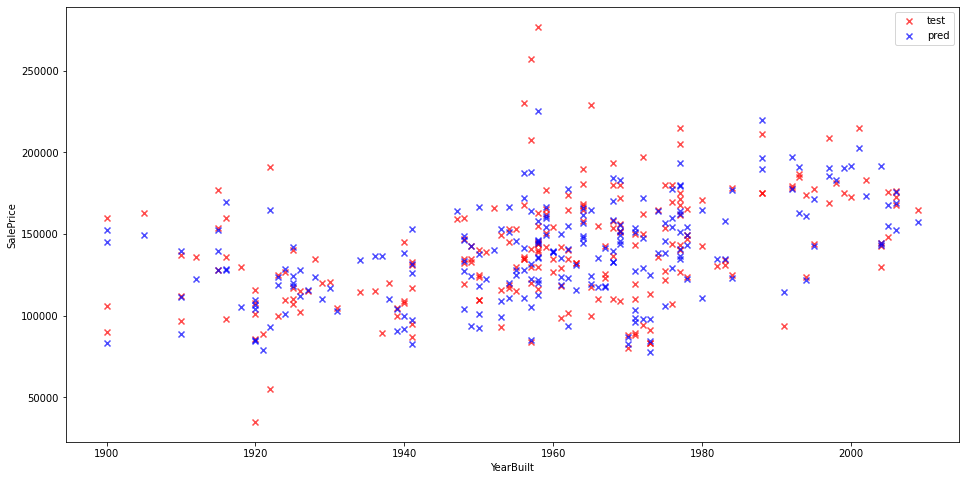

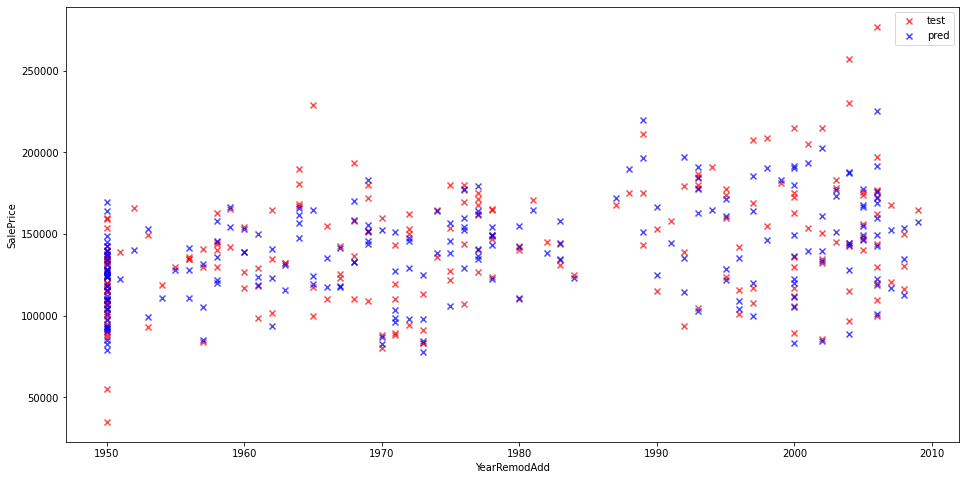

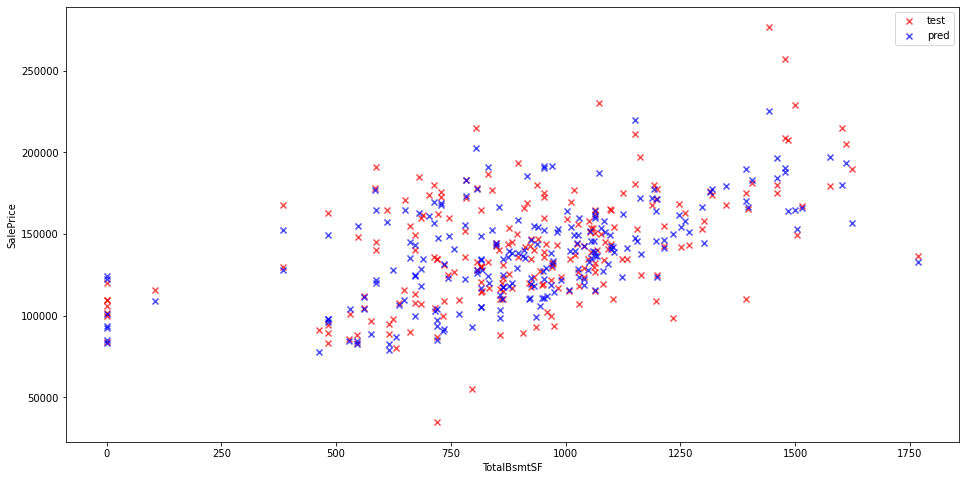

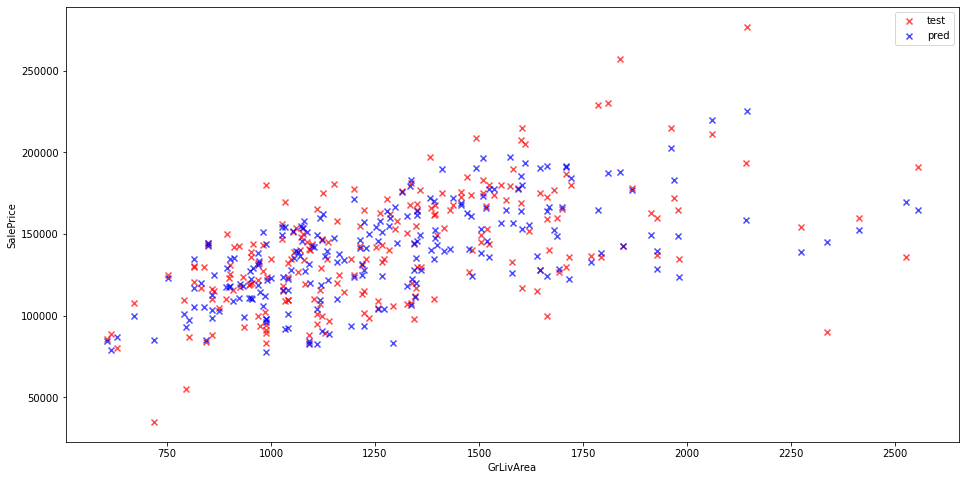

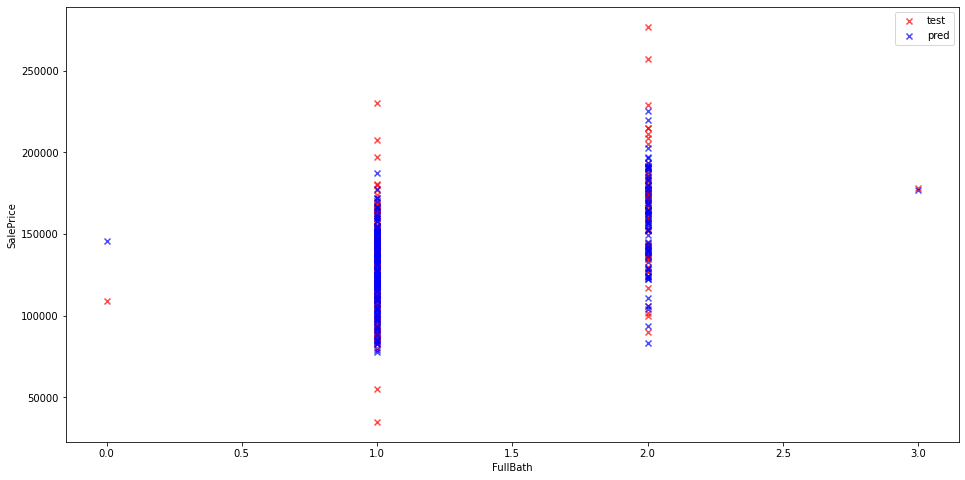

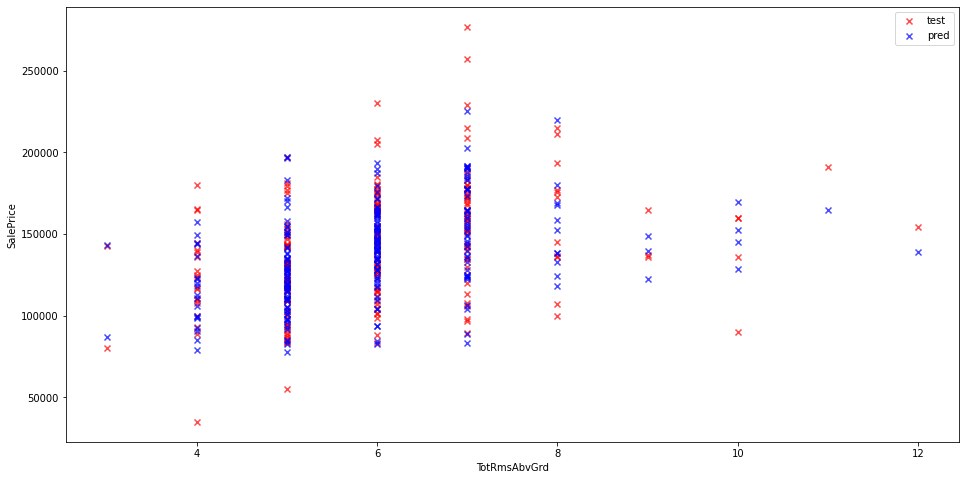

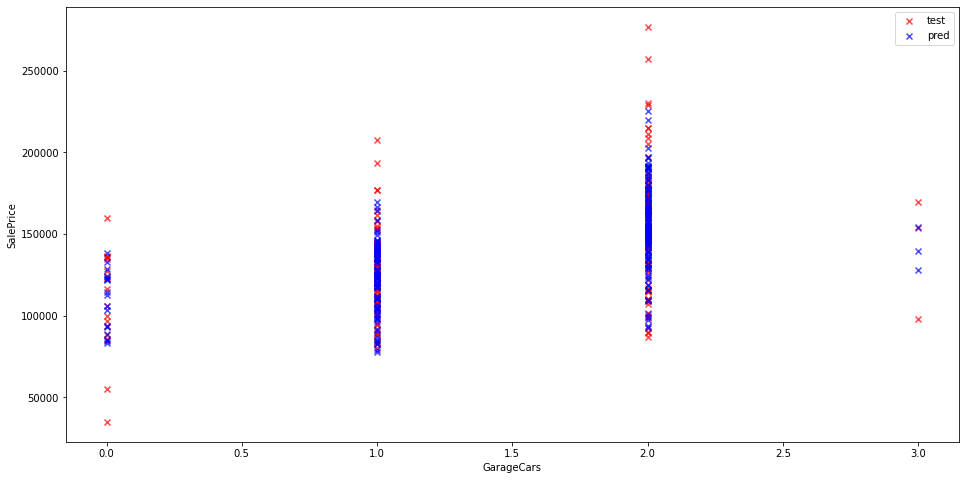

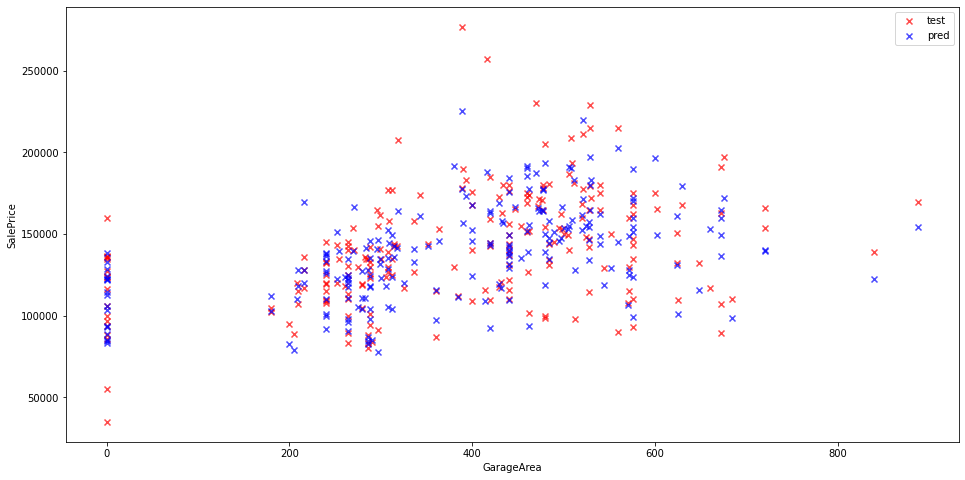

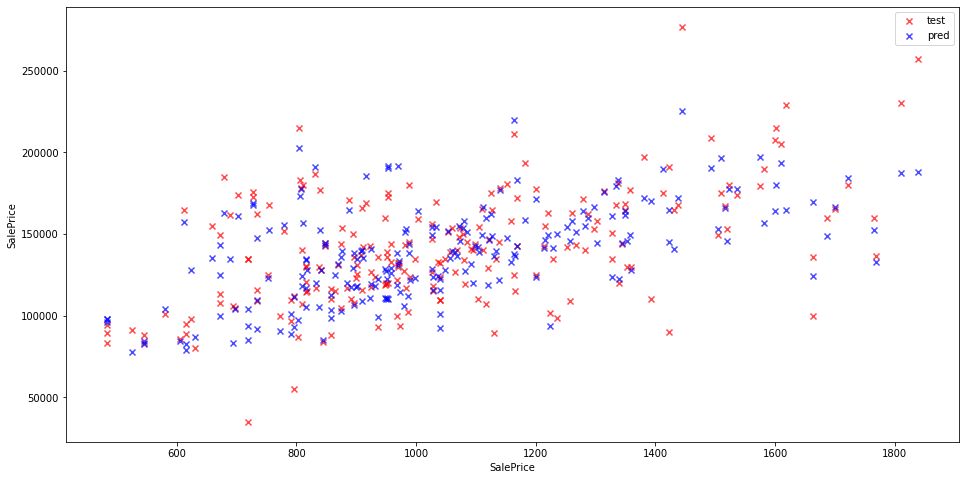

***決定木***
平均二乗誤差(RMSE):697189191.8741311(26404.34039839153)
平均絶対誤差:19839.979559785115
決定係数:0.40929251314349857


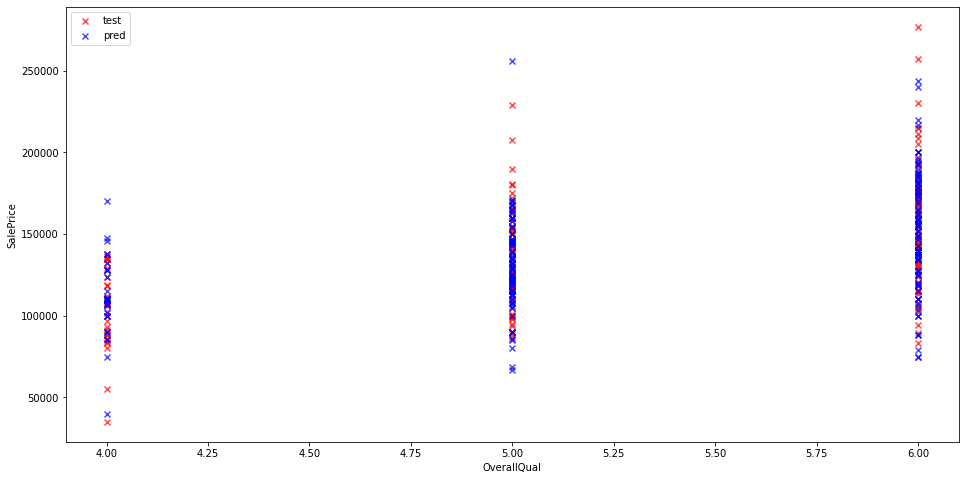

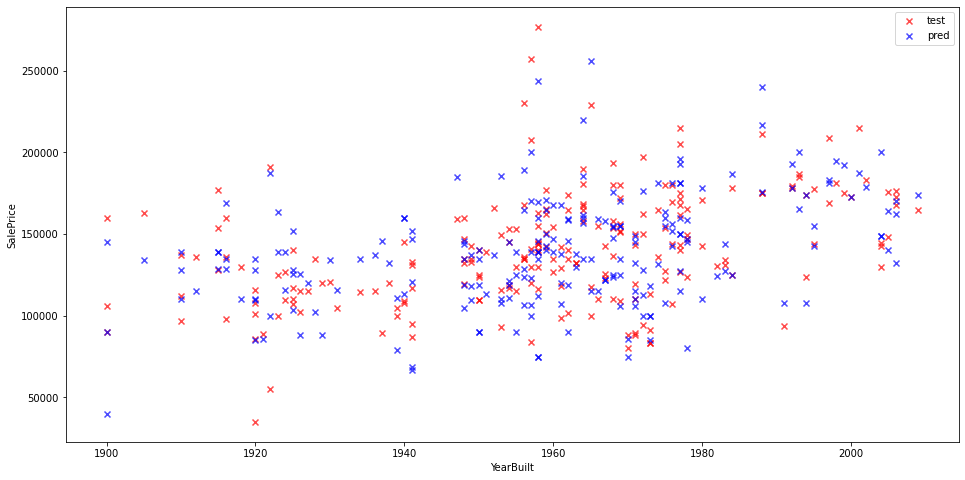

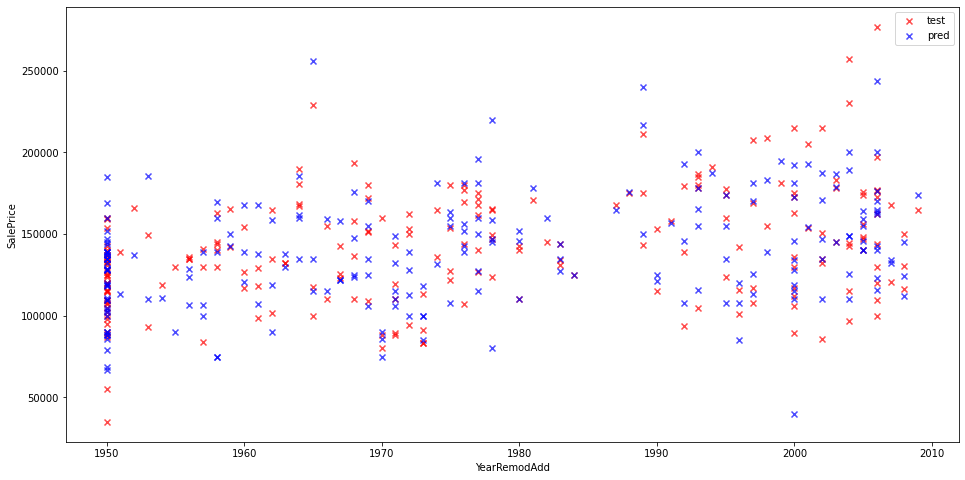

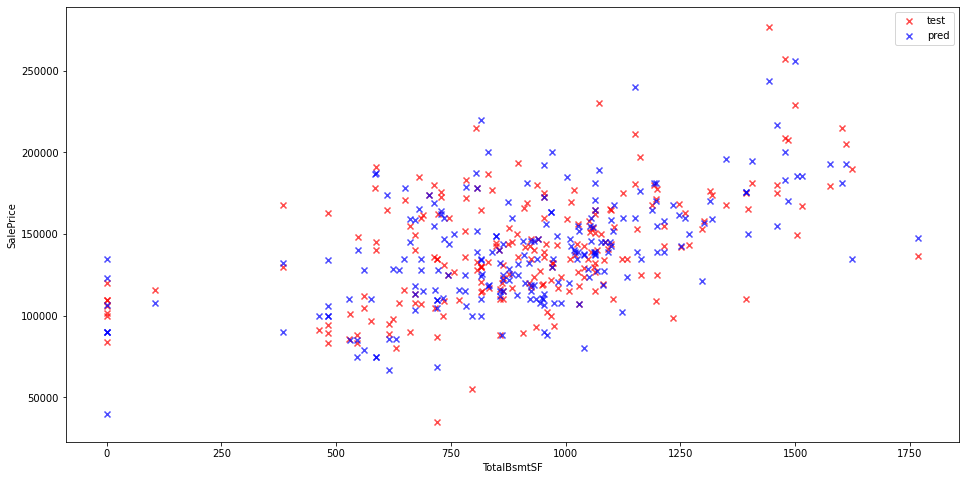

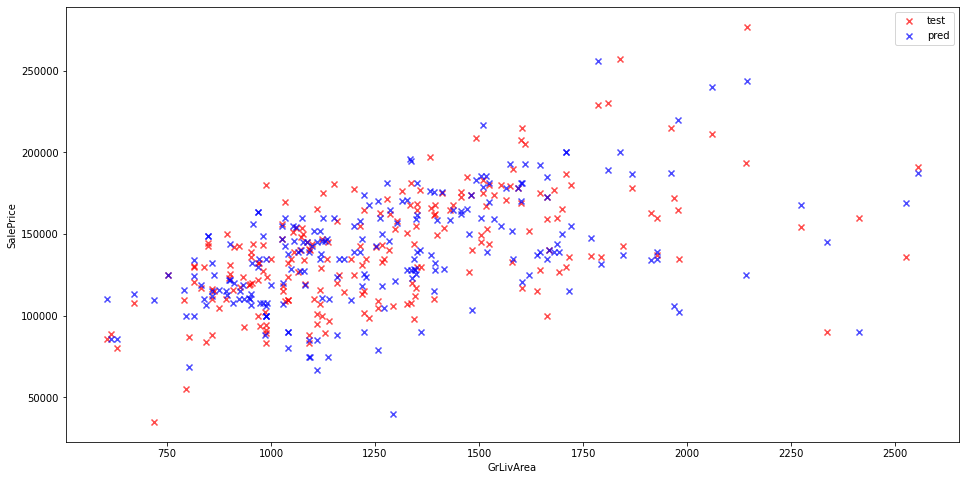

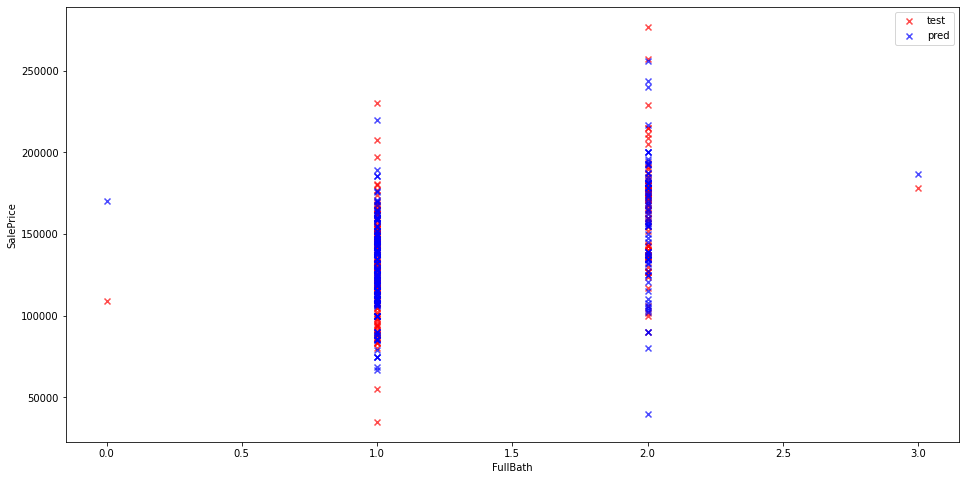

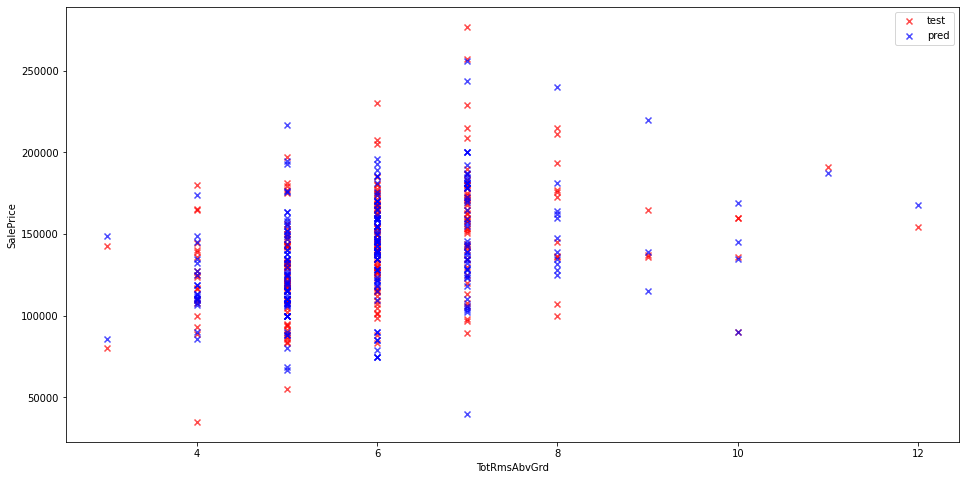

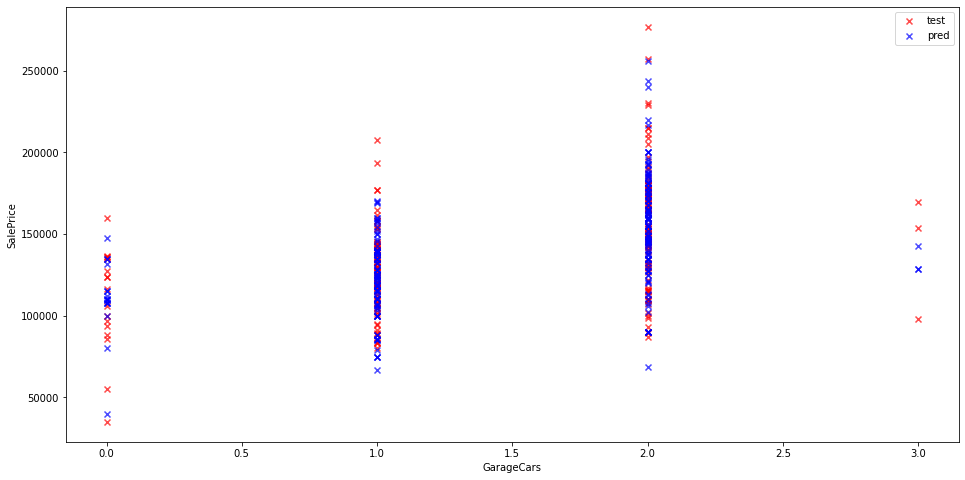

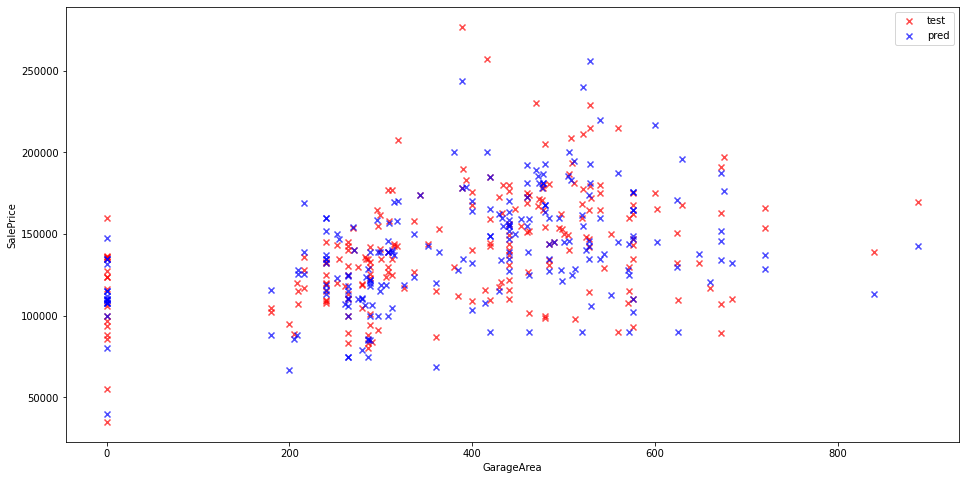

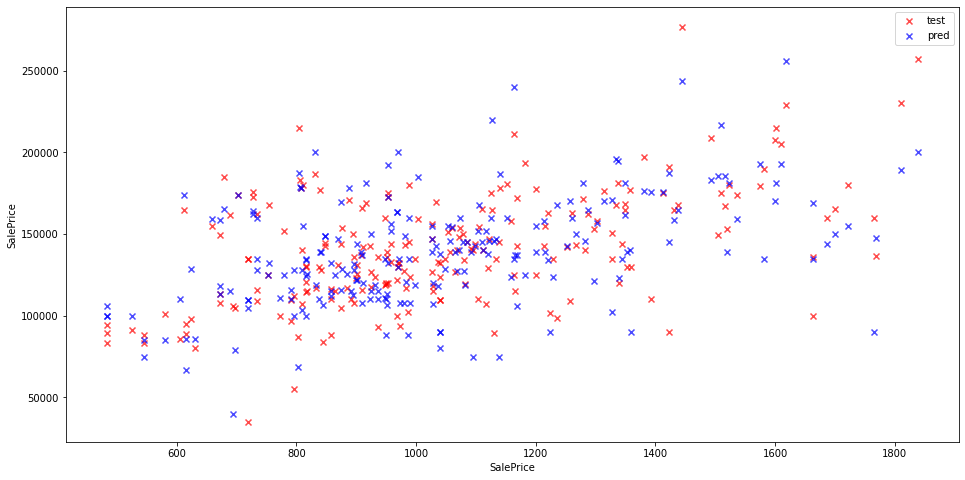

***ランダムフォレスト***
平均二乗誤差(RMSE):407071769.202644(20176.019657074186)
平均絶対誤差:14149.107448577915
決定係数:0.6551003019574408


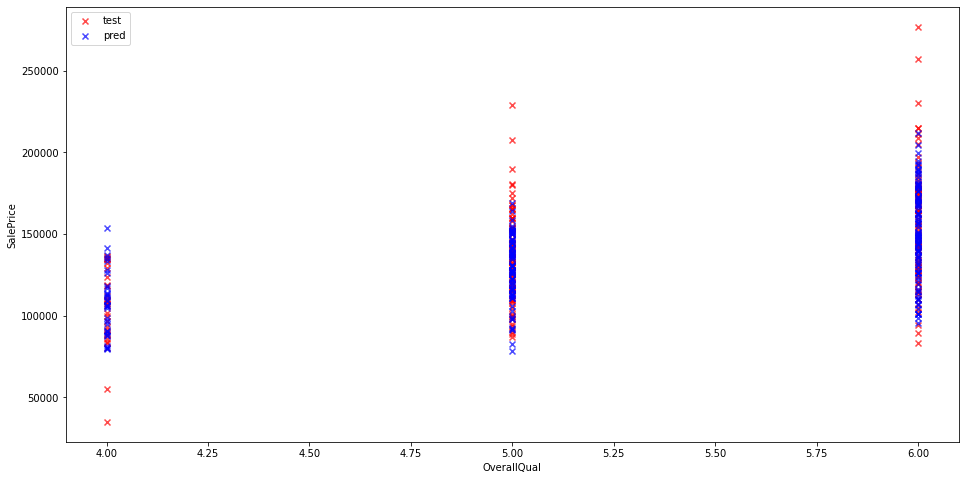

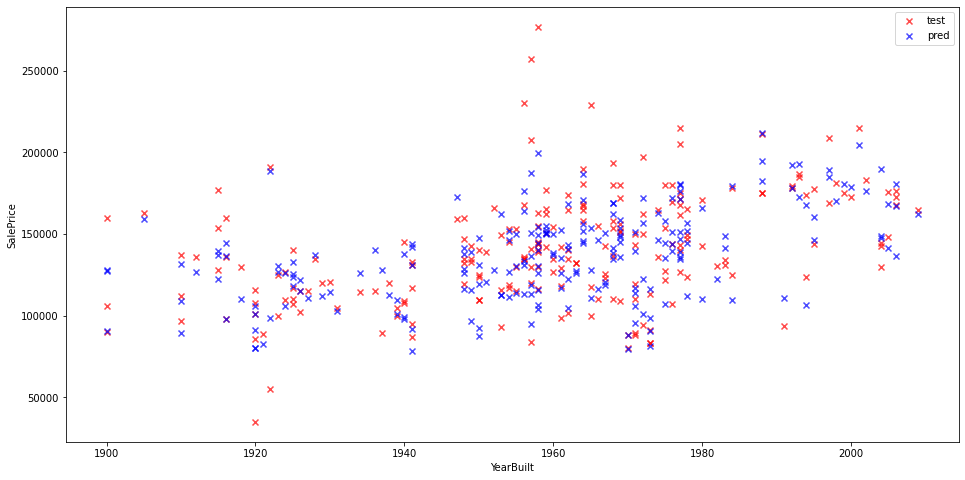

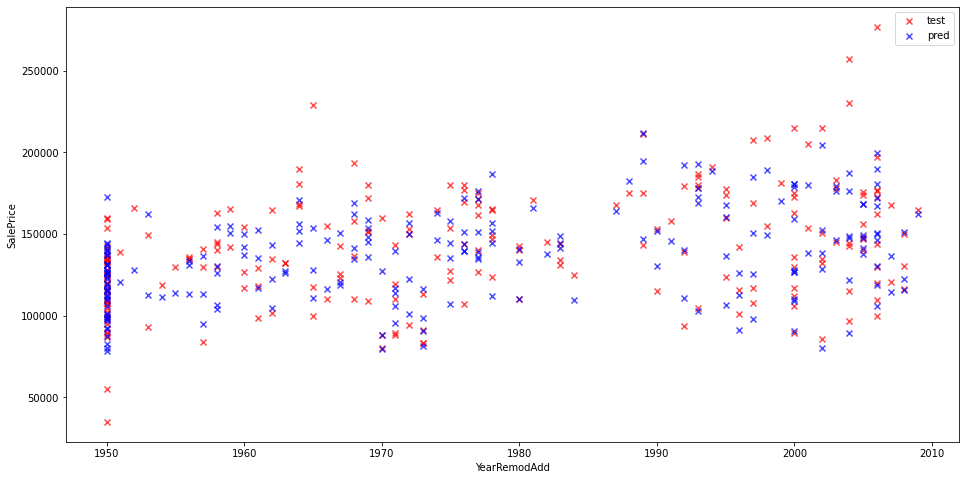

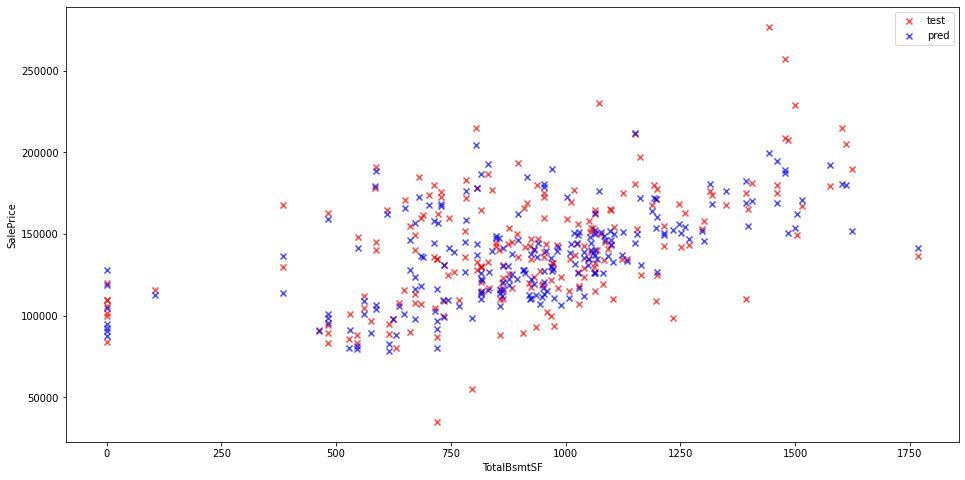

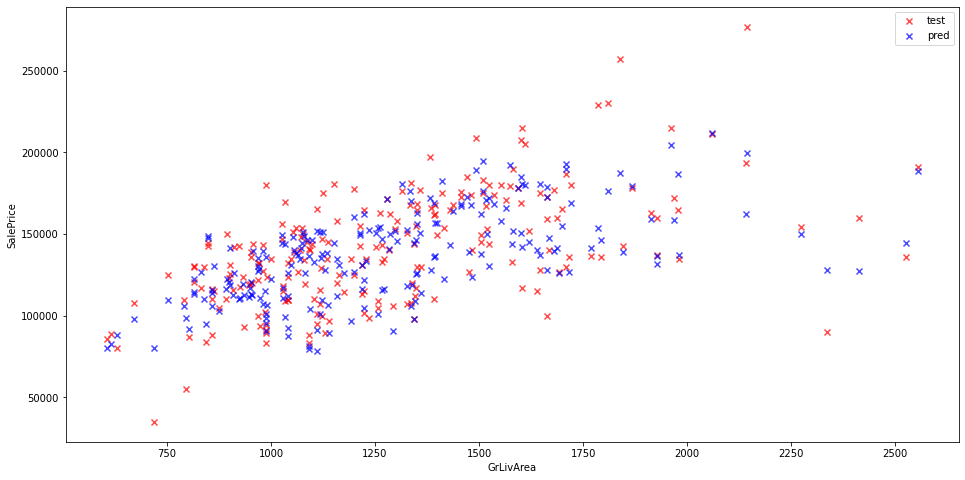

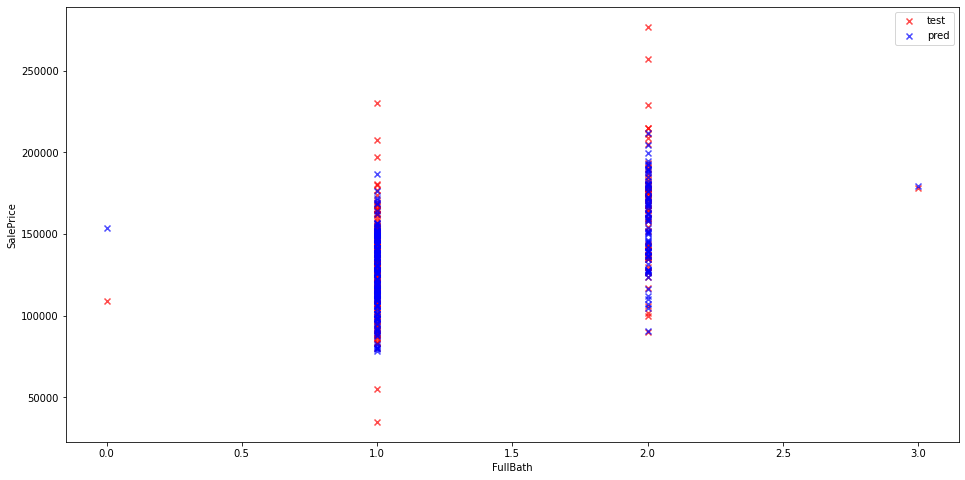

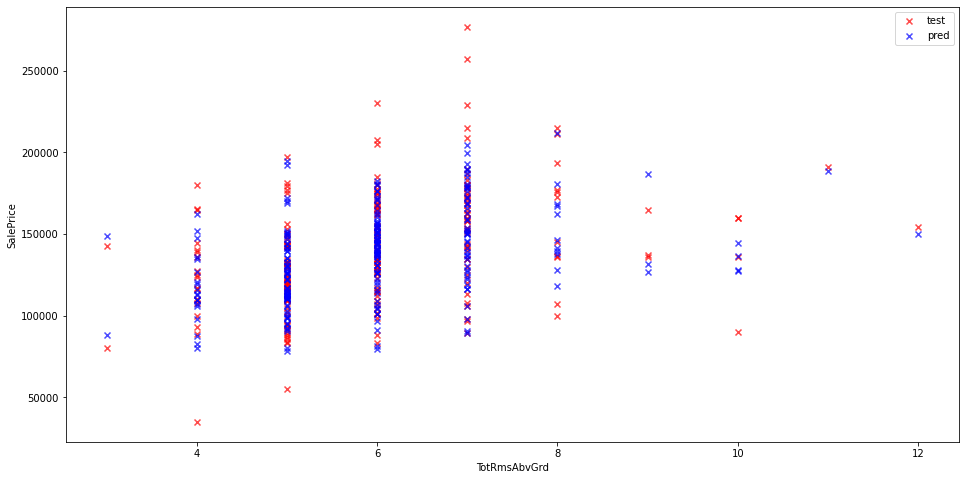

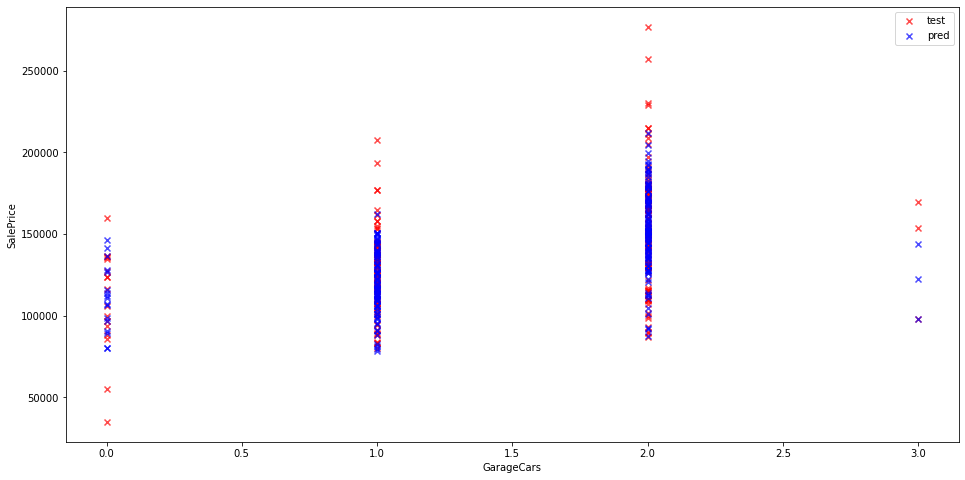

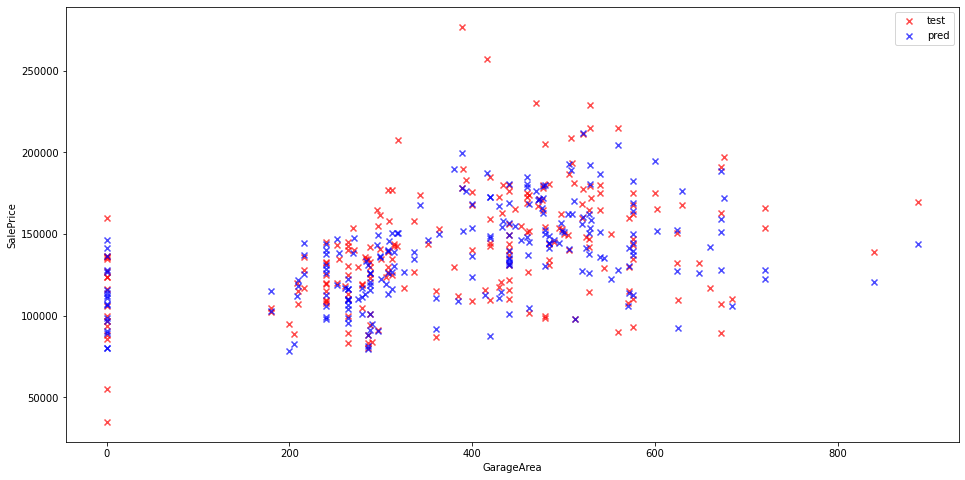

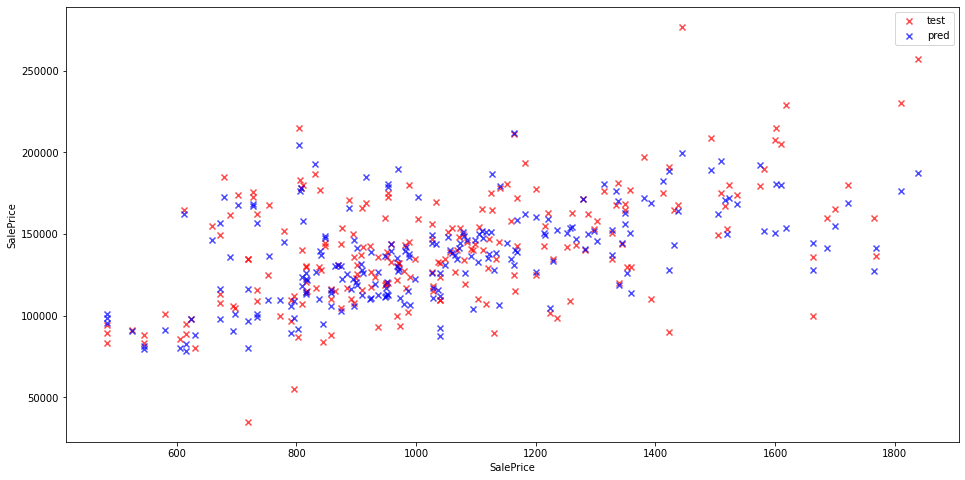

{'lr': {'mse': 357396133.5704647, 'rmse': 18904.92352723133, 'mae': 13906.063424791222, 'r2': 0.6971889777778508}, 'svm': {'mse': 377688008.06351715, 'rmse': 19434.196872099375, 'mae': 13937.31727955281, 'r2': 0.6799962812686333}, 'dt': {'mse': 697189191.8741311, 'rmse': 26404.34039839153, 'mae': 19839.979559785115, 'r2': 0.40929251314349857}, 'rf': {'mse': 407071769.202644, 'rmse': 20176.019657074186, 'mae': 14149.107448577915, 'r2': 0.6551003019574408}}


In [26]:
dict_metrics_3 = {}

# 線形回帰
lr_3 = LinearRegression()
print("***線形回帰***")
dict_metrics_3['lr'] = scale2plot(scaler, X_train_3, X_test_3, y_train_3.ravel(), y_test_3.ravel(), lr_3, df_select_3.columns)

# SVM
svm_3 = SVR()
print("***SVM***")
dict_metrics_3['svm'] = scale2plot(scaler, X_train_3, X_test_3, y_train_3.ravel(), y_test_3.ravel(), svm_3, df_select_3.columns)

# 決定木
dt_3 = DecisionTreeRegressor()
print("***決定木***")
dict_metrics_3['dt'] = scale2plot(scaler, X_train_3, X_test_3, y_train_3.ravel(), y_test_3.ravel(), dt_3, df_select_3.columns)

# ランダムフォレスト
rf_3 = RandomForestRegressor()
print("***ランダムフォレスト***")
dict_metrics_3['rf'] = scale2plot(scaler, X_train_3, X_test_3, y_train_3.ravel(), y_test_3.ravel(), rf_3, df_select_3.columns)

print(dict_metrics_3)

In [27]:
pd.DataFrame(dict_metrics_3)

,lr,svm,dt,rf
mse,3.573961e+08,3.776880e+08,6.971892e+08,4.070718e+08
rmse,1.890492e+04,1.943420e+04,2.640434e+04,2.017602e+04
mae,1.390606e+04,1.393732e+04,1.983998e+04,1.414911e+04
r2,6.971890e-01,6.799963e-01,4.092925e-01,6.551003e-01


In [28]:
pd.DataFrame(dict_metrics_2)

,lr,svm,dt,rf
mse,3.620736e+09,2.058262e+09,3.467152e+09,2.218793e+09
rmse,6.017255e+04,4.536807e+04,5.888253e+04,4.710406e+04
mae,3.165619e+04,2.866774e+04,3.661278e+04,2.891587e+04
r2,4.366948e-01,6.797808e-01,4.605891e-01,6.548057e-01


どの手法についても全体的に指標値が改善した。分割前のデータを間引いて整理していたため、テストデータもそれなりにモデルに近くなっている値が使われていたためだと思われる。
そのためMSE(RMSE)やMAEについては改善が顕著に表れている。が、決定係数については上記式の分母も小さくなるため全体としてはあまり変わらない(線形回帰はは著しく改善しており、決定木は悪化している)。

作成した関数が機能分割されていなく学習から図示まで全て実施してしまっている作りになっており検証に手間がかかるため(言い訳)、今回はここまでとする。

継続課題として、各手法の仕組みを調査しておく。